## **Lab 7: Data Analysis**

### **Exercise 2**

### **Download Dataset**

In [1]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz

--2024-11-01 16:02:07--  http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘SUSY.csv.gz’

SUSY.csv.gz             [      <=>           ] 879.65M  18.8MB/s    in 63s     

2024-11-01 16:03:10 (13.9 MB/s) - ‘SUSY.csv.gz’ saved [922377711]



In [2]:
!gunzip SUSY.csv.gz

In [3]:
ls -lh

total 2.3G
drwxr-xr-x 1 root root 4.0K Oct 30 13:23 sample_data/
-rw-r--r-- 1 root root 2.3G Nov  1 16:03 SUSY.csv


In [4]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

In [5]:
!ls -lh

total 2.3G
drwxr-xr-x 1 root root 4.0K Oct 30 13:23 sample_data
-rw-r--r-- 1 root root 2.3G Nov  1 16:03 SUSY.csv


In [6]:
!wc -l SUSY.csv

5000000 SUSY.csv


In [7]:
!head -500000 SUSY.csv > SUSY-small.csv

In [8]:
ls -lh

total 2.5G
drwxr-xr-x 1 root root 4.0K Oct 30 13:23 sample_data/
-rw-r--r-- 1 root root 2.3G Nov  1 16:03 SUSY.csv
-rw-r--r-- 1 root root 228M Nov  1 16:04 SUSY-small.csv


In [9]:
! wc -l SUSY-small.csv

500000 SUSY-small.csv


In [10]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

In [11]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [12]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [13]:
FeatureNames

['MET_rel',
 'axial_MET',
 'M_R',
 'cos_theta_r1',
 'S_R',
 'M_Delta_R',
 'dPhi_r_b',
 'M_TR_2',
 'R',
 'MT2']

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [16]:
df

signal    l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
0           0.0  0.972861  0.653855  1.176225  1.157156 -1.739873 -0.874309   
1           1.0  1.667973  0.064191 -1.225171  0.506102 -0.338939  1.672543   
2           1.0  0.444840 -0.134298 -0.709972  0.451719 -1.613871 -0.768661   
3           1.0  0.381256 -0.976145  0.693152  0.448959  0.891753 -0.677328   
4           1.0  1.309996 -0.690089 -0.676259  1.589283 -0.693326  0.622907   
...         ...       ...       ...       ...       ...       ...       ...   
4999995     1.0  0.853325 -0.961783 -1.487277  0.678190  0.493580  1.647969   
4999996     0.0  0.951581  0.139370  1.436884  0.880440 -0.351948 -0.740852   
4999997     0.0  0.840389  1.419162 -1.218766  1.195631  1.695645  0.663756   
4999998     1.0  1.784218 -0.833565 -0.560091  0.953342 -0.688969 -1.428233   
4999999     0.0  0.761500  0.680454 -1.186213  1.043521 -0.316755  0.246879   

              MET   MET_phi   MET_rel  axial_MET       M_R    M_TR_2  \
0        0.567765 -0.175000  0.810061  -0.252552  1.921887  0.889637   
1        3.475464 -1.219136  0.012955   3.775174  1.045977  0.568051   
2        1.219918  0.504026  1.831248  -0.431385  0.526283  0.941514   
3        2.033060  1.533041  3.046260  -1.005285  0.569386  1.015211   
4        1.087562 -0.381742  0.589204   1.365479  1.179295  0.968218   
...           ...       ...       ...        ...       ...       ...   
4999995  1.843867  0.276954  1.025105  -1.486535  0.892879  1.684429   
4999996  0.290863 -0.732360  0.001360   0.257738  0.802871  0.545319   
4999997  0.490888 -0.509186  0.704289   0.045744  0.825015  0.723530   
4999998  2.660703 -0.861344  2.116892   2.906151  1.232334  0.952444   
4999999  1.120280  0.998479  1.640881  -0.797688  0.854212  1.121858   

                R       MT2       S_R  M_Delta_R  dPhi_r_b  cos_theta_r1  
0        0.410772  1.145621  1.932632   0.994464  1.367815      0.040714  
1        0.481928  0.000000  0.448410   0.205356  1.321893      0.377584  
2        1.587535  2.024308  0.603498   1.562374  1.135454      0.180910  
3        1.582217  1.551914  0.761215   1.715464  1.492257      0.090719  
4        0.728563  0.000000  1.083158   0.043429  1.154854      0.094859  
...           ...       ...       ...        ...       ...           ...  
4999995  1.674084  3.366298  1.046707   2.646649  1.389226      0.364599  
4999996  0.602730  0.002998  0.748959   0.401166  0.443471      0.239953  
4999997  0.778236  0.752942  0.838953   0.614048  1.210595      0.026692  
4999998  0.685846  0.000000  0.781874   0.676003  1.197807      0.093689  
4999999  1.165438  1.498351  0.931580   1.293524  1.539167      0.187496  

[5000000 rows x 19 columns]

In [17]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

l_1_pT


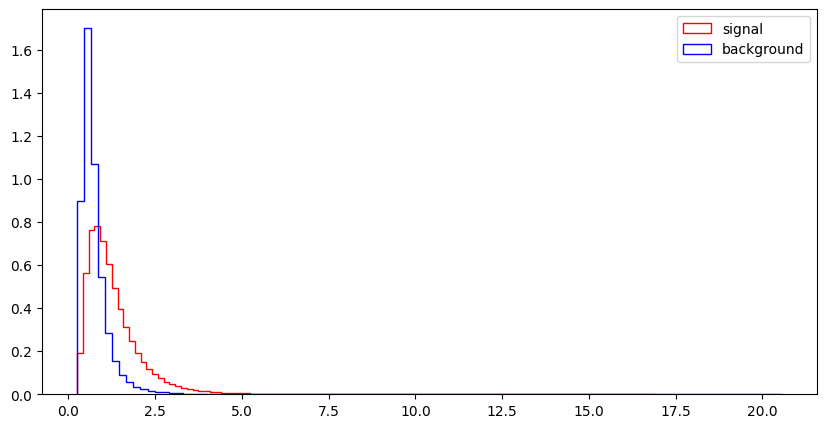

l_1_eta


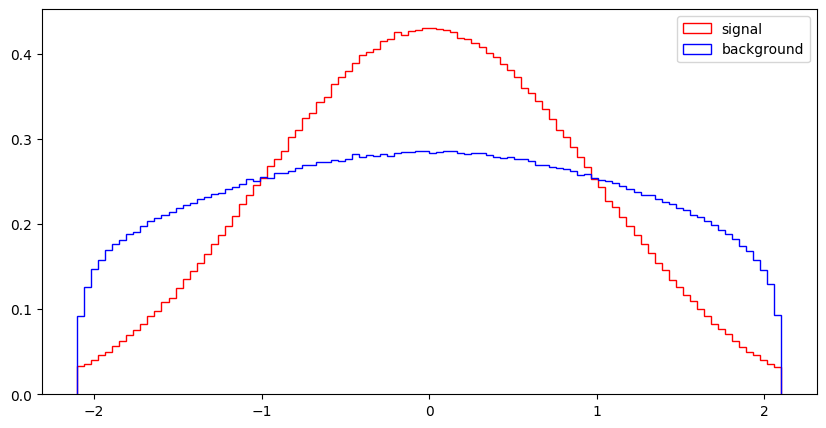

l_1_phi


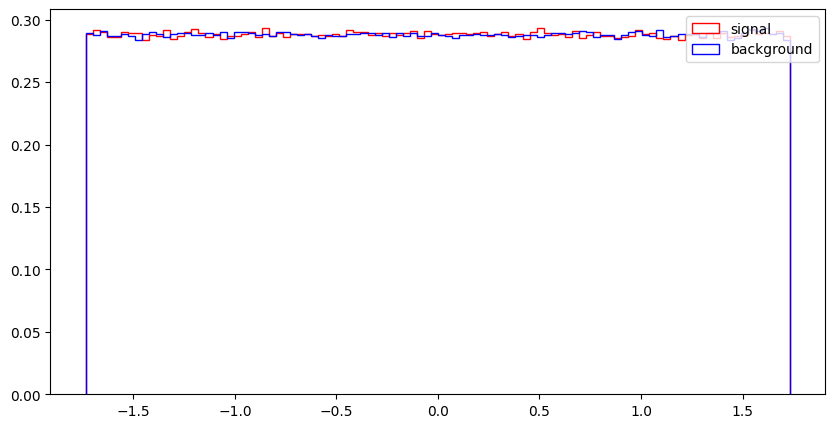

l_2_pT


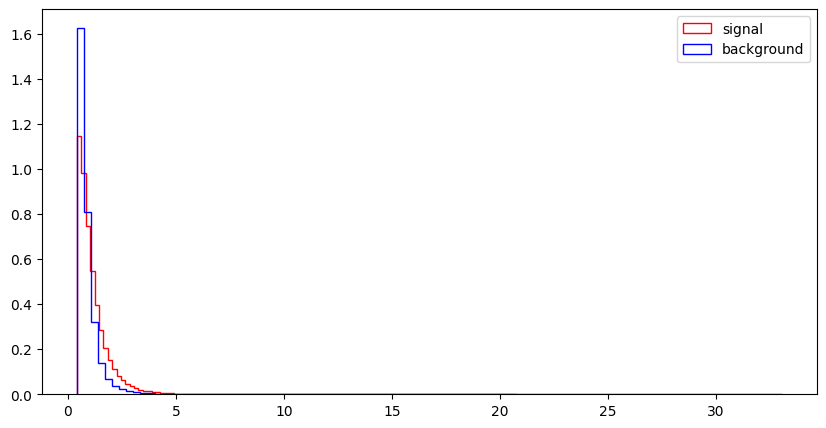

l_2_eta


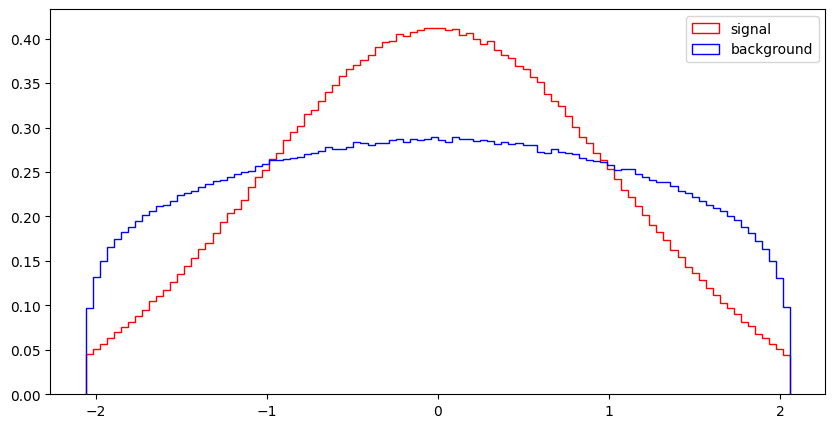

l_2_phi


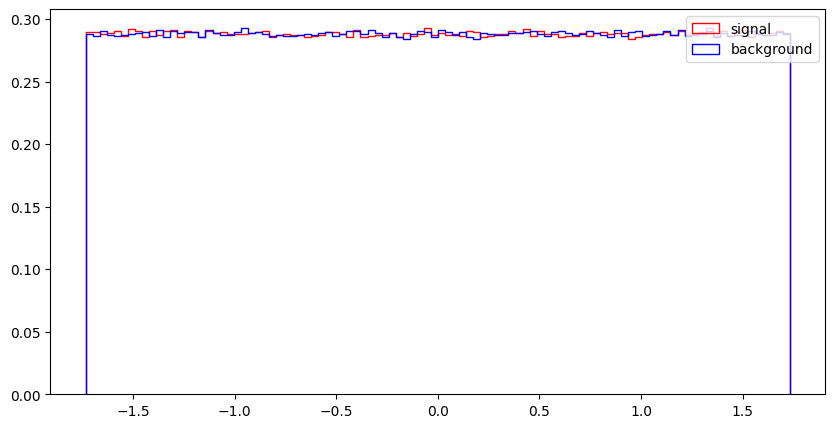

MET


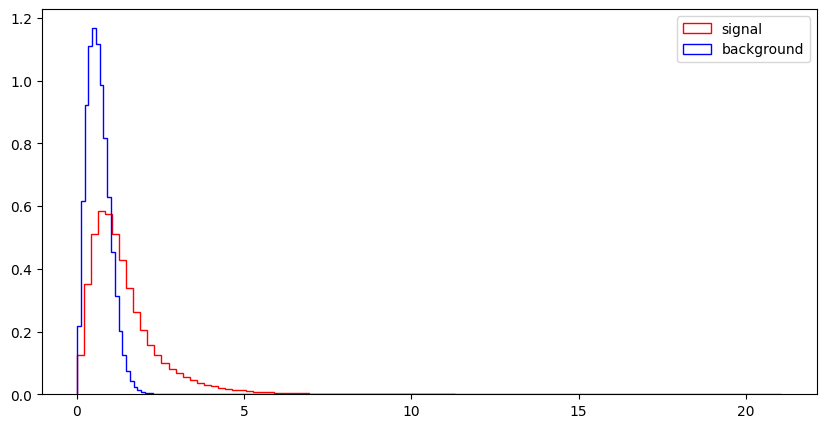

MET_phi


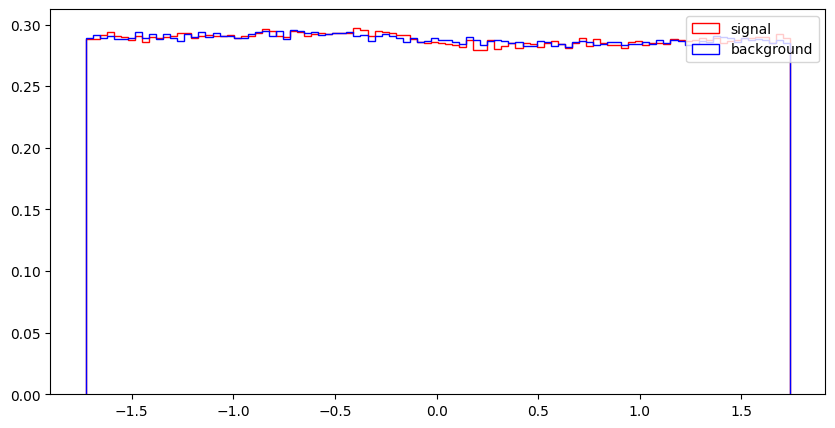

MET_rel


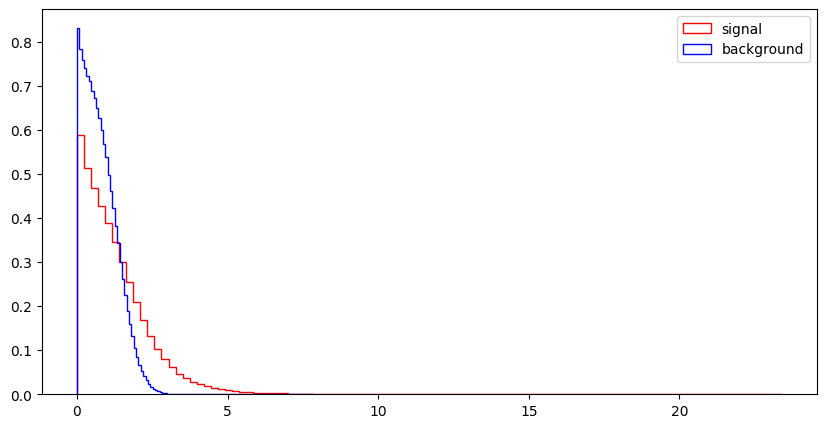

axial_MET


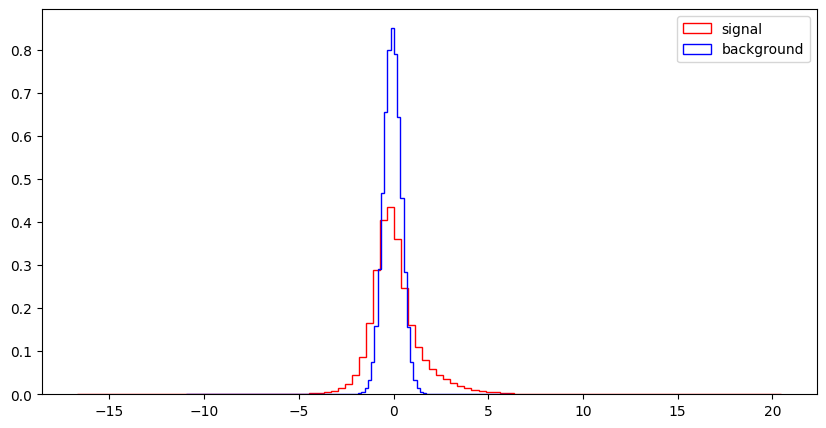

M_R


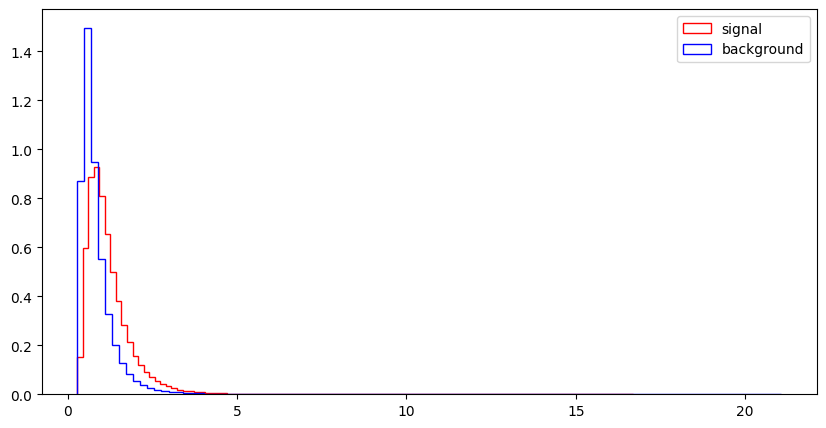

M_TR_2


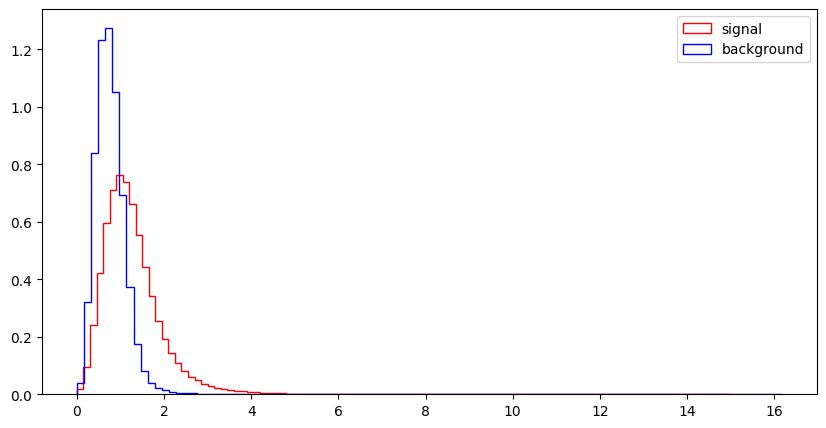

R


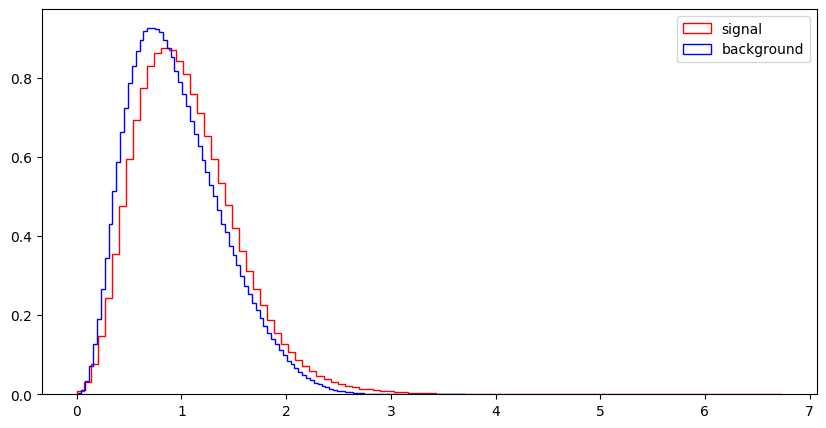

MT2


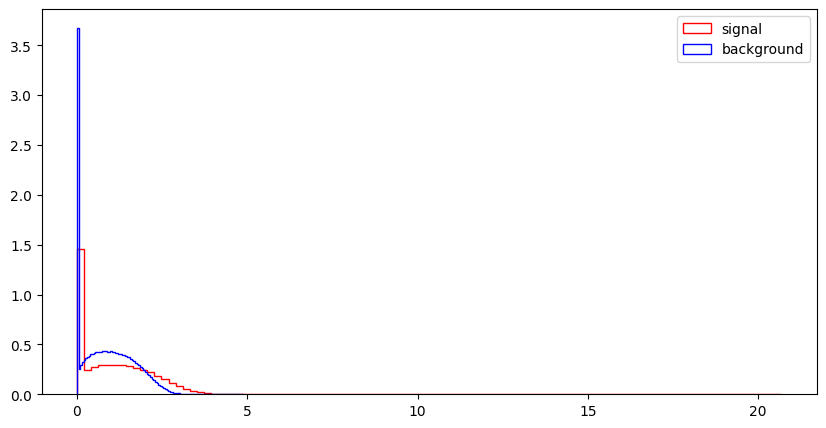

S_R


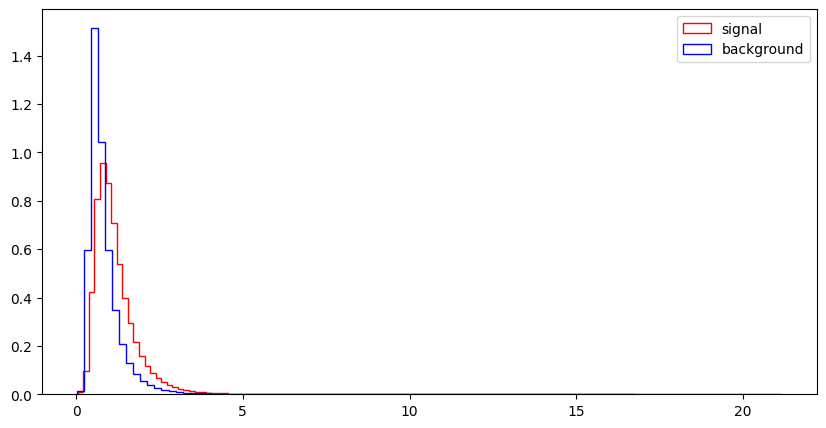

M_Delta_R


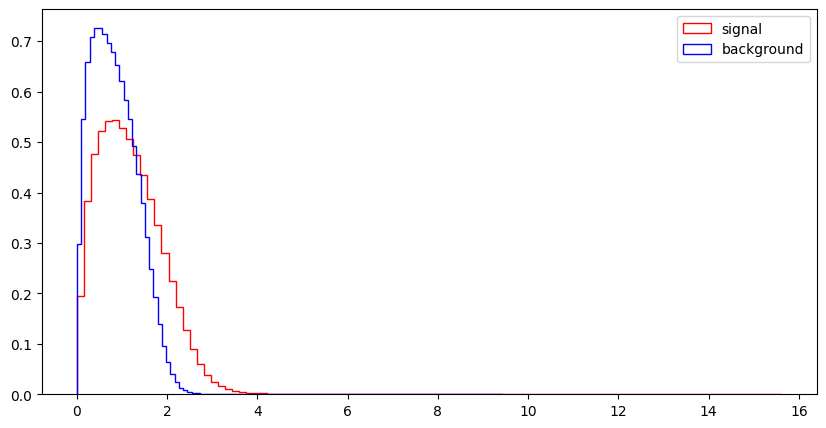

dPhi_r_b


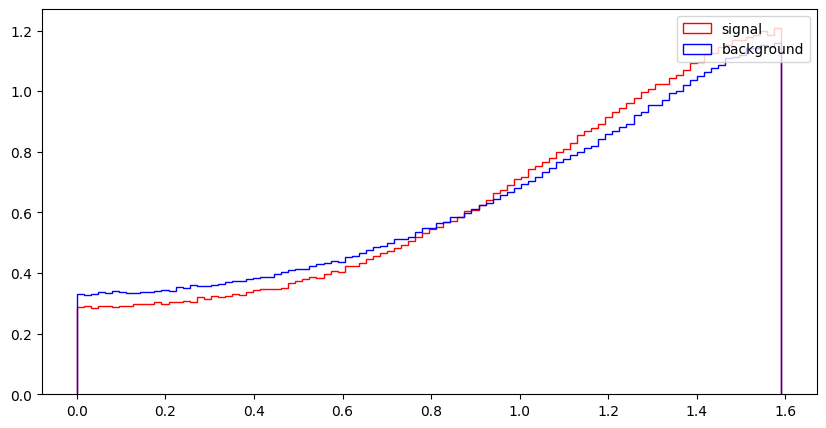

cos_theta_r1


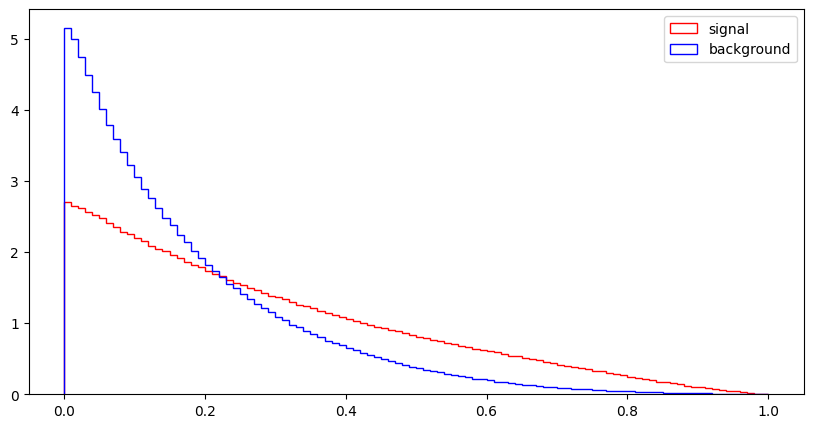

In [18]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

### **Exercise 3**

Now use matplotlib to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted matplotlib figures with multiple plots. Note that the plots in the paper are actually wrong!

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
import pandas as pd

# Load the SUSY dataset
df = pd.read_csv('SUSY-small.csv', header=None)

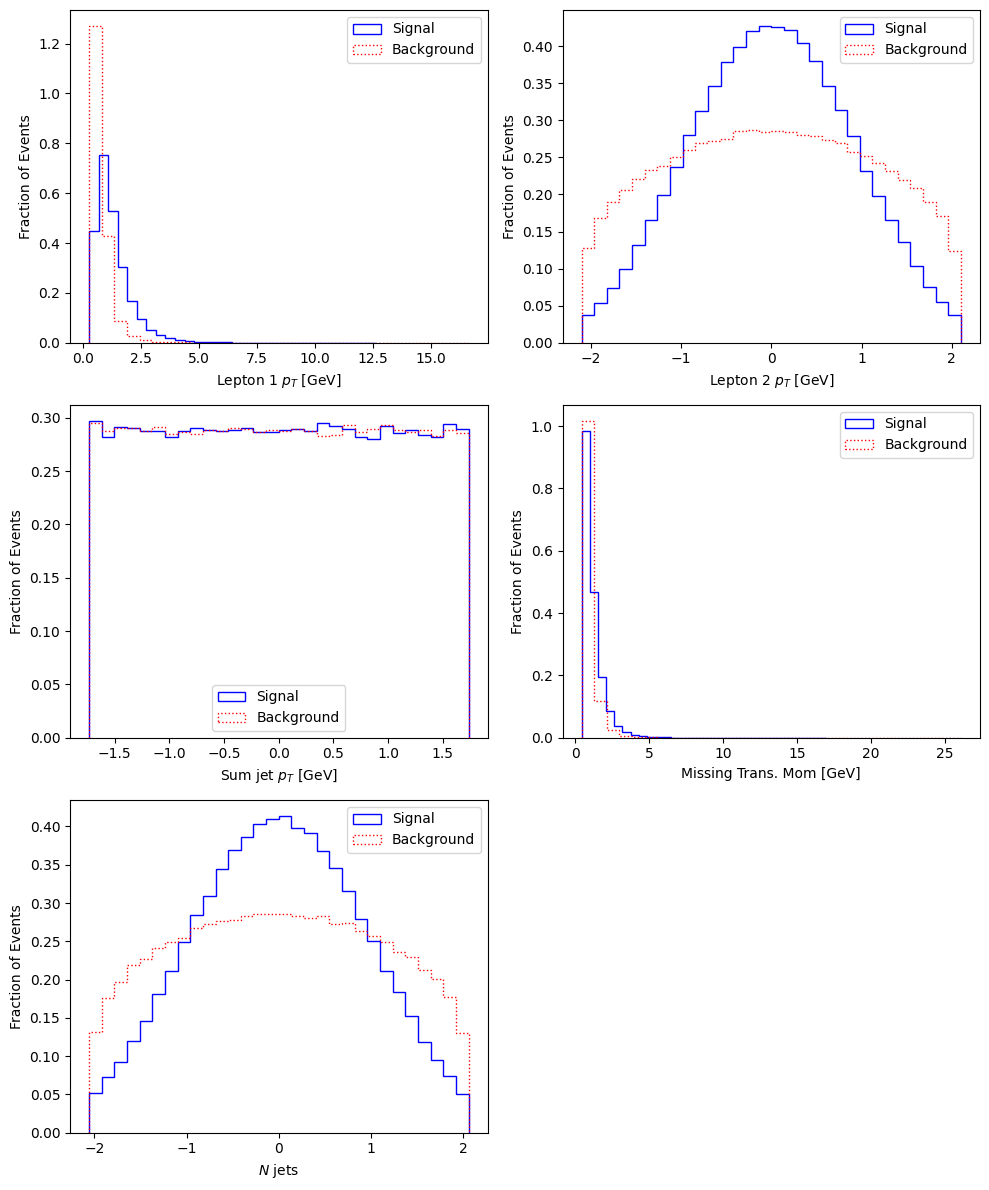

In [ ]:
# Figure 5

import matplotlib.pyplot as plt
import numpy as np

# Function to plot histograms for signal and background
def plot_feature(ax, signal_data, background_data, title, column):
    ax.hist(signal_data[column], bins=30, density=True, histtype='step', color='blue', label='Signal')
    ax.hist(background_data[column], bins=30, density=True, histtype='step', color='red', linestyle='dotted', label='Background')
    ax.set_xlabel(title)
    ax.set_ylabel('Fraction of Events')
    ax.legend()

# Separate signal and background
signal = df[df[0] == 1]
background = df[df[0] == 0]

features = [
    ("Lepton 1 $p_T$ [GeV]", 1),
    ("Lepton 2 $p_T$ [GeV]", 2),
    ("Sum jet $p_T$ [GeV]", 3),
    ("Missing Trans. Mom [GeV]", 4),
    ("$N$ jets", 5)
]

fig, axs = plt.subplots(3, 2, figsize=(10, 12))
axs = axs.ravel()

# Plot each feature using the function
for i, (title, col) in enumerate(features):
    plot_feature(axs[i], signal, background, title, col)

# Hide the last empty subplot
axs[-1].axis('off')

plt.tight_layout()
plt.show()


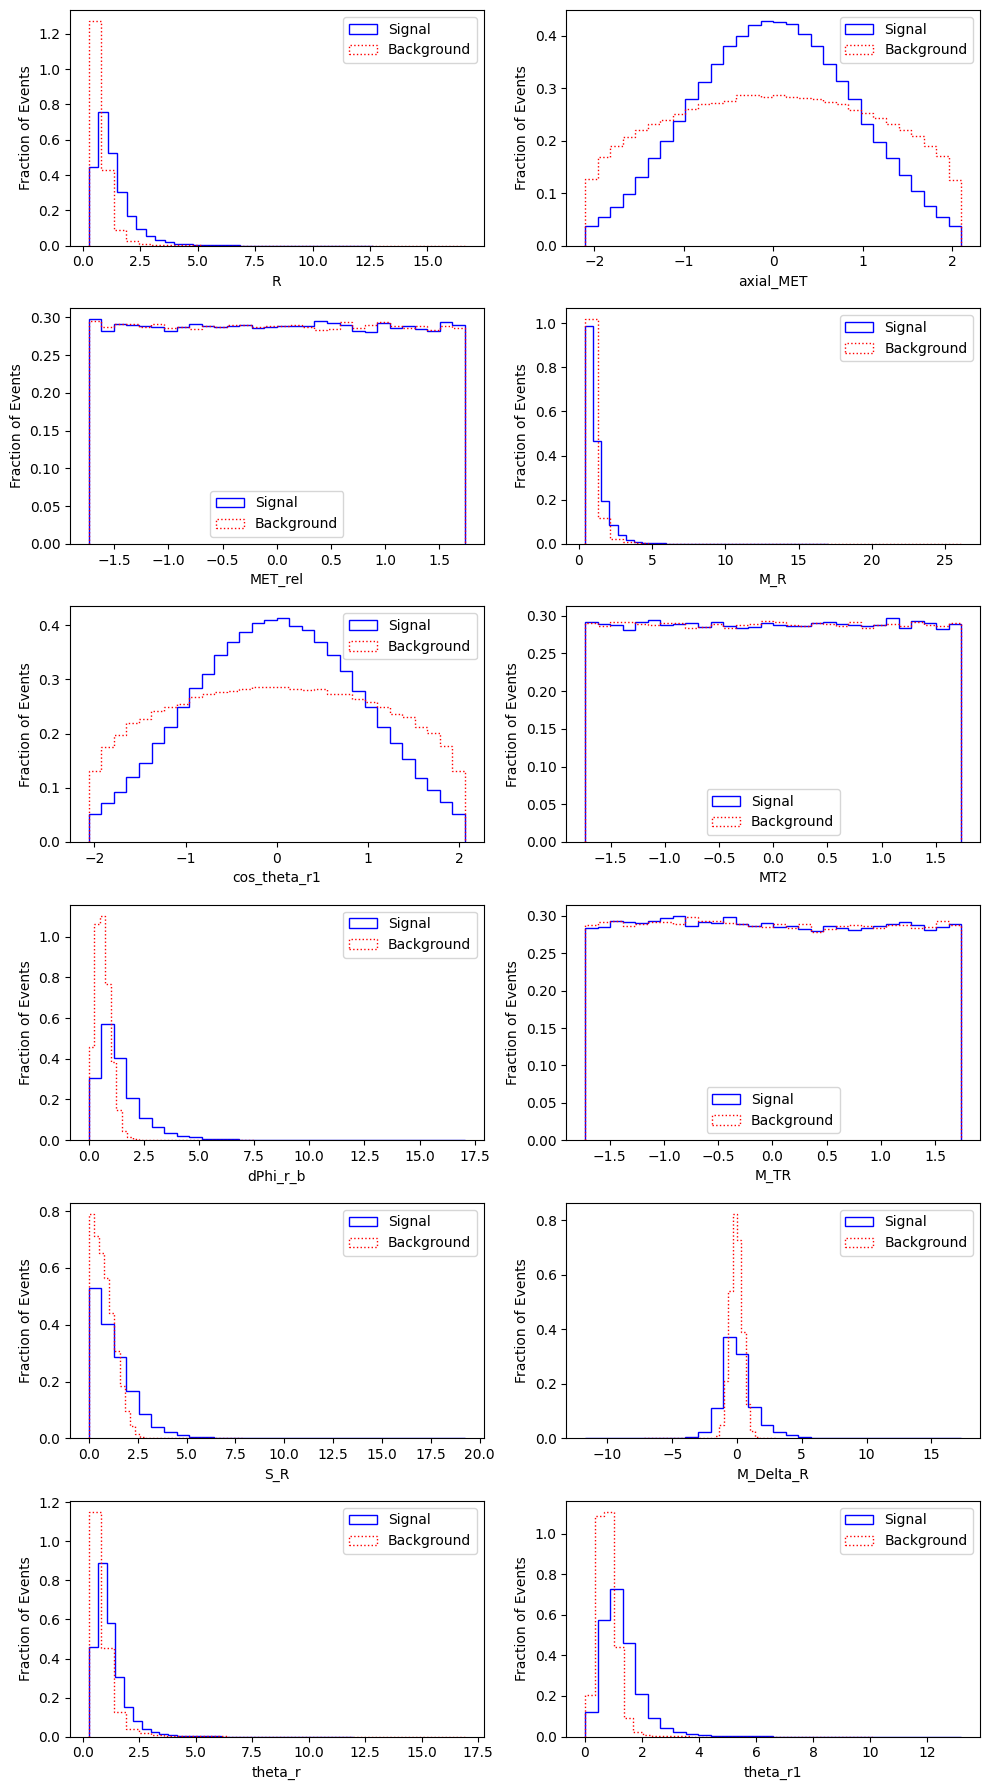

In [ ]:
# Figure 6

import matplotlib.pyplot as plt
import numpy as np

# Function to plot histograms for signal and background
def plot_feature(ax, signal_data, background_data, title, column):
    ax.hist(signal_data[column], bins=30, density=True, histtype='step', color='blue', label='Signal')
    ax.hist(background_data[column], bins=30, density=True, histtype='step', color='red', linestyle='dotted', label='Background')
    ax.set_xlabel(title)
    ax.set_ylabel('Fraction of Events')
    ax.legend()

# Separate signal and background
signal = df[df[0] == 1]
background = df[df[0] == 0]

features = [
    ("R", 1),
    ("axial_MET", 2),
    ("MET_rel", 3),
    ("M_R", 4),
    ("cos_theta_r1", 5),
    ("MT2", 6),
    ("dPhi_r_b", 7),
    ("M_TR", 8),
    ("S_R", 9),
    ("M_Delta_R", 10),
    ("theta_r", 11),
    ("theta_r1", 12)
]

# Create subplots: 6 rows and 2 columns for a total of 12 plots
fig, axs = plt.subplots(6, 2, figsize=(10, 18))
axs = axs.ravel()

# Plot each feature using the function
for i, (title, col) in enumerate(features):
    plot_feature(axs[i], signal, background, title, col)

# Hide any remaining empty subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

### **Exercise 4**

### **Exercise 4.1**

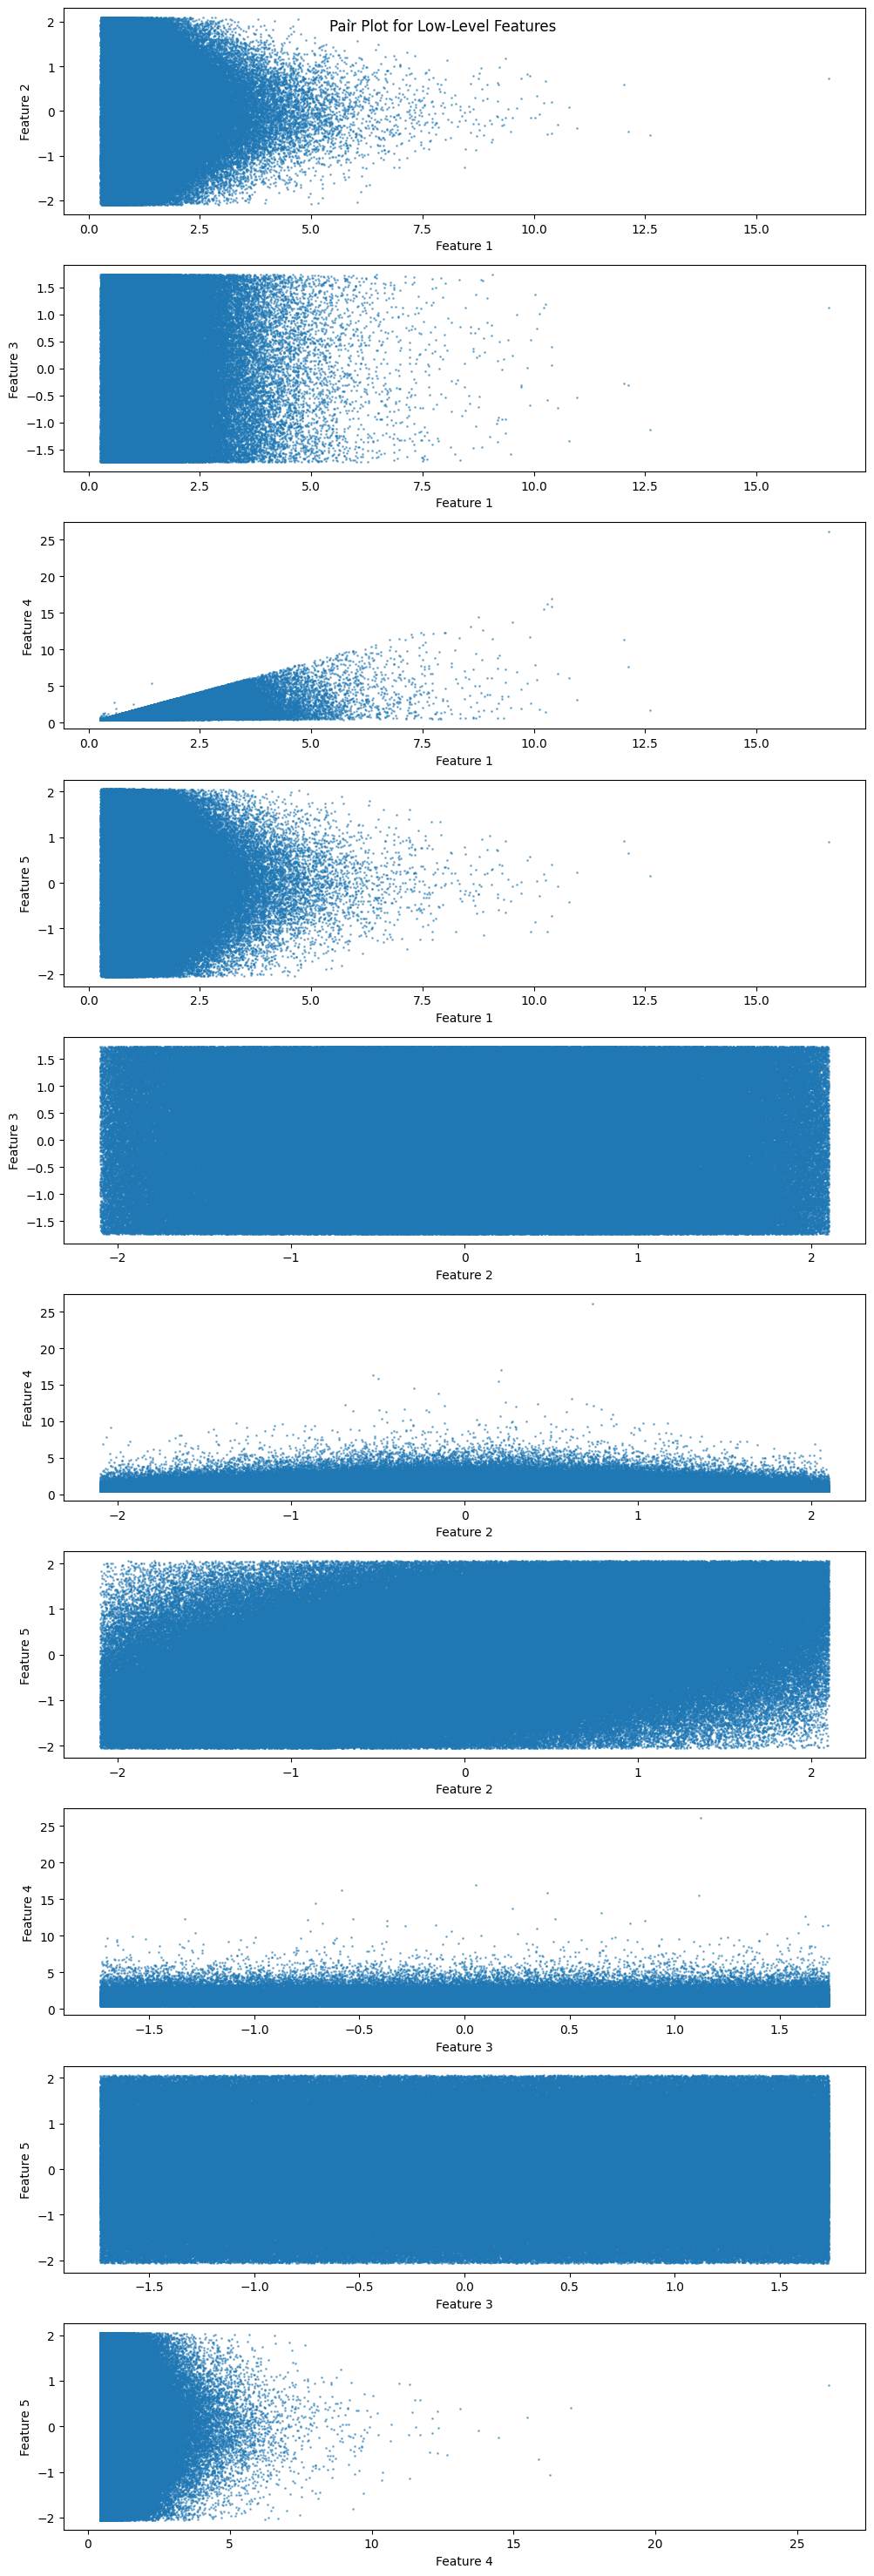

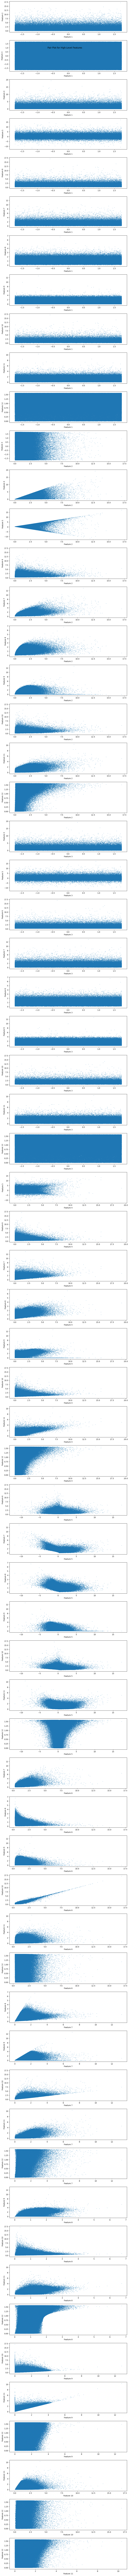

In [ ]:
# Part a

import itertools
import matplotlib.pyplot as plt

# Separate low- and high-level features
low_level_features = df.iloc[:, 1:6]  # Columns 1 to 5 are low-level features
high_level_features = df.iloc[:, 6:18]  # Columns 6 to 17 are high-level features

def create_pair_plot(features, title):
    feature_combinations = itertools.combinations(range(features.shape[1]), 2)
    num_plots = sum(1 for _ in feature_combinations)  # Count combinations for subplotting

    # Create figure and axes for subplots
    fig, axs = plt.subplots(num_plots, figsize=(10, num_plots * 3))

    # Reset the combination generator since it was exhausted
    feature_combinations = itertools.combinations(range(features.shape[1]), 2)

    for i, (x_idx, y_idx) in enumerate(feature_combinations):
        axs[i].scatter(features.iloc[:, x_idx], features.iloc[:, y_idx], s=1, alpha=0.5)
        axs[i].set_xlabel(f'Feature {x_idx + 1}')
        axs[i].set_ylabel(f'Feature {y_idx + 1}')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Create pair plots for low- and high-level features
create_pair_plot(low_level_features, "Pair Plot for Low-Level Features")
create_pair_plot(high_level_features, "Pair Plot for High-Level Features")

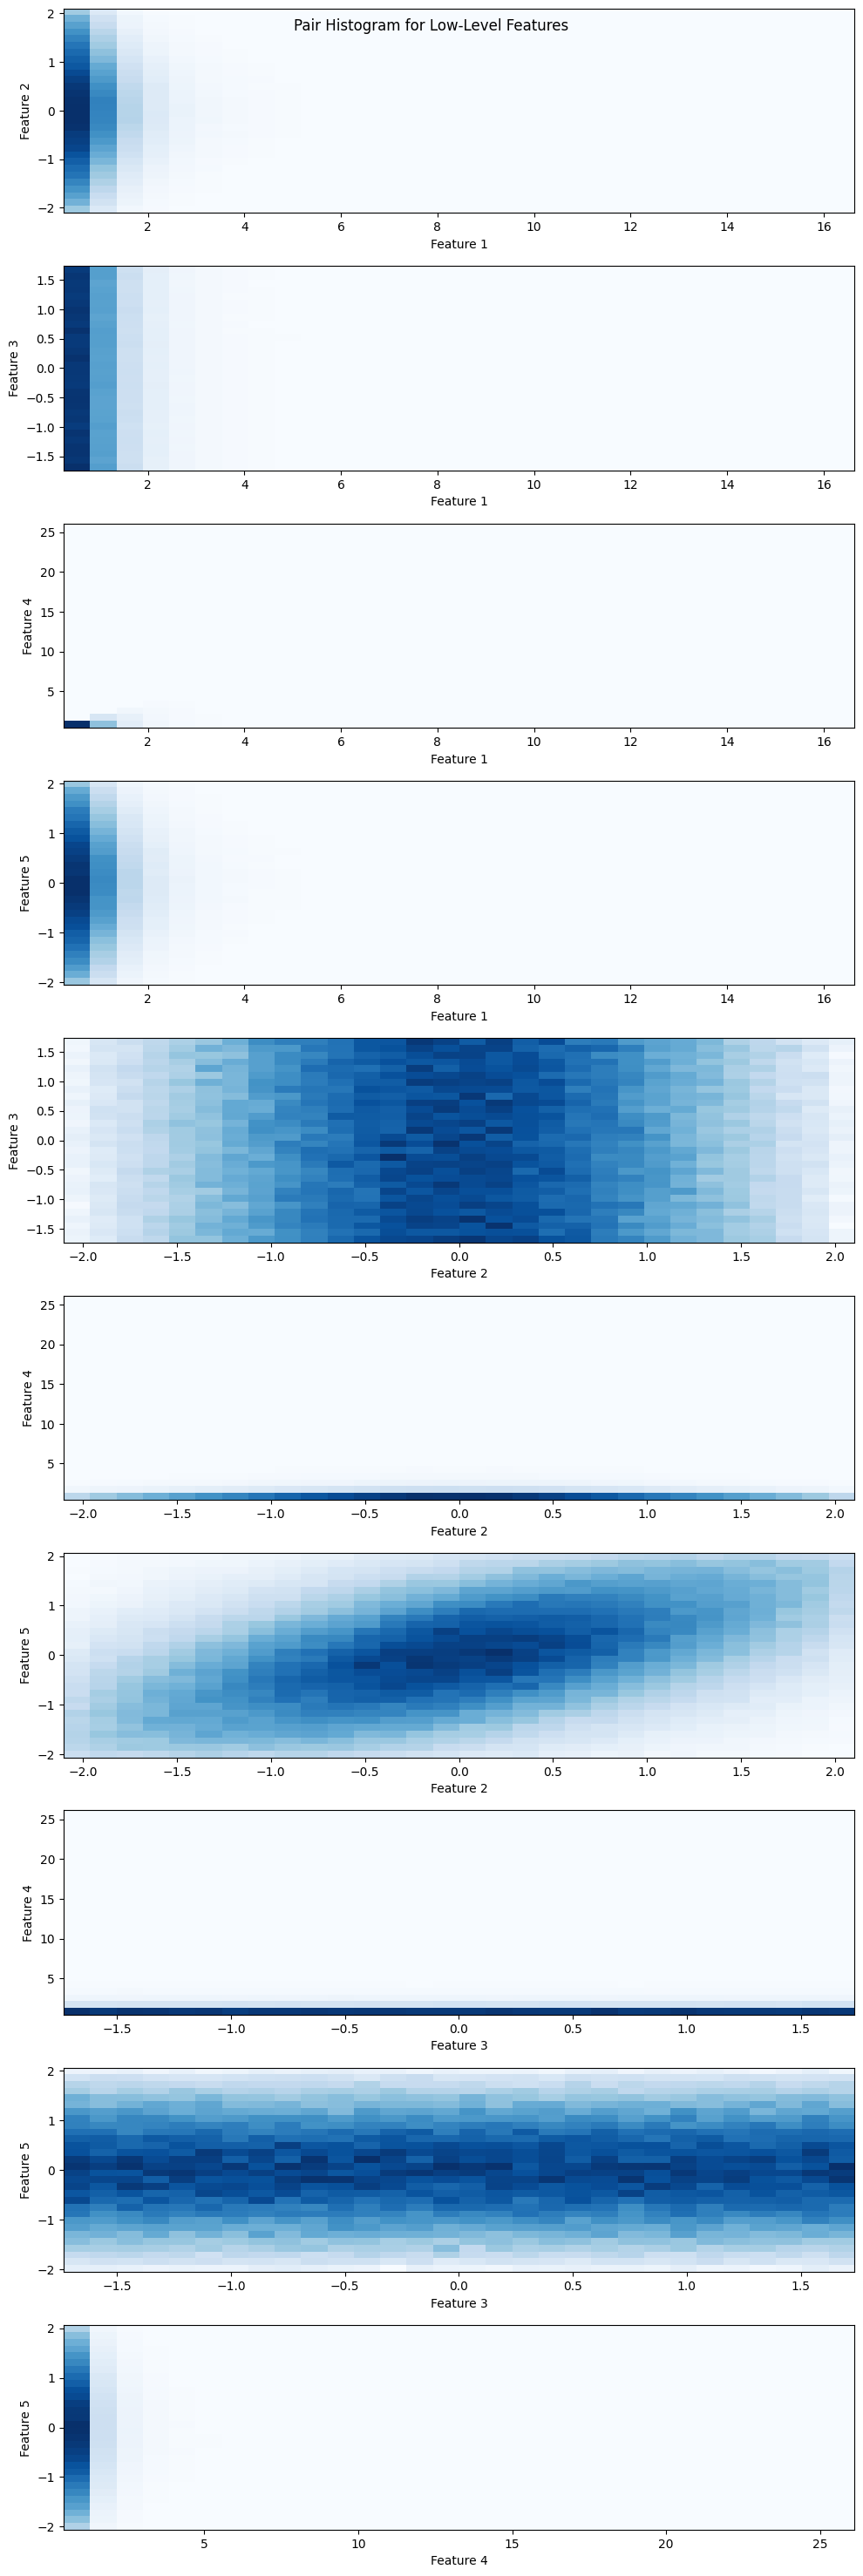

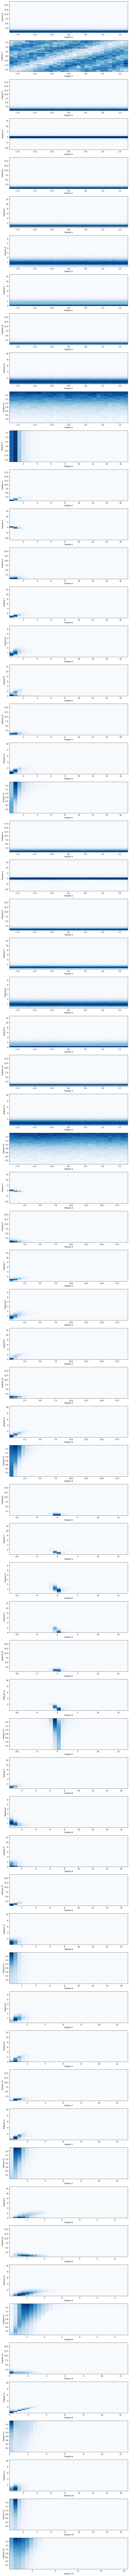

In [ ]:
# Part b

import itertools
import matplotlib.pyplot as plt
import numpy as np

# Separate low- and high-level features
low_level_features = df.iloc[:, 1:6]  # Columns 1 to 5 are low-level features
high_level_features = df.iloc[:, 6:18]  # Columns 6 to 17 are high-level features

def create_pair_histogram(features, title, bins=30):
    num_features = features.shape[1]
    feature_combinations = list(itertools.combinations(range(num_features), 2))
    num_plots = len(feature_combinations)

    # Create figure and axes for subplots
    fig, axs = plt.subplots(num_plots, figsize=(10, num_plots * 3))

    for i, (x_idx, y_idx) in enumerate(feature_combinations):
        # Create a 2D histogram for each pair of features
        hist, x_edges, y_edges = np.histogram2d(
            features.iloc[:, x_idx],
            features.iloc[:, y_idx],
            bins=bins
        )

        # Plotting the histogram
        axs[i].imshow(hist.T, origin='lower', aspect='auto', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], cmap='Blues')
        axs[i].set_xlabel(f'Feature {x_idx + 1}')
        axs[i].set_ylabel(f'Feature {y_idx + 1}')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Create pair histograms for low- and high-level features
create_pair_histogram(low_level_features, "Pair Histogram for Low-Level Features")
create_pair_histogram(high_level_features, "Pair Histogram for High-Level Features")

### **Exercise 4.2**

### **Part a**

In [ ]:
!pip install tabulate

### **Part b**

In [21]:
# Extract low-level and high-level features
low_level_features = df.iloc[:, 1:6]  # Columns 1 to 5
high_level_features = df.iloc[:, 6:18]  # Columns 6 to 17
all_features = df.iloc[:, 1:]  # All features starting from column 1

# Covariance and correlation matrices for all features
cov_matrix_all = np.cov(all_features, rowvar=False)
corr_matrix_all = np.corrcoef(all_features, rowvar=False)

# Covariance and correlation matrices for low-level features
cov_matrix_low = np.cov(low_level_features, rowvar=False)
corr_matrix_low = np.corrcoef(low_level_features, rowvar=False)

# Covariance and correlation matrices for high-level features
cov_matrix_high = np.cov(high_level_features, rowvar=False)
corr_matrix_high = np.corrcoef(high_level_features, rowvar=False)

### **Part c**

In [22]:
from tabulate import tabulate
import numpy as np

# Sample data
df = pd.read_csv('SUSY-small.csv', header=None)

# Extract low-level and high-level features
low_level_features = df.iloc[:, 1:6]
high_level_features = df.iloc[:, 6:18]
all_features = df.iloc[:, 1:]

# Covariance and correlation matrices
cov_matrix_all = np.cov(all_features, rowvar=False)
corr_matrix_all = np.corrcoef(all_features, rowvar=False)

cov_matrix_low = np.cov(low_level_features, rowvar=False)
corr_matrix_low = np.corrcoef(low_level_features, rowvar=False)

cov_matrix_high = np.cov(high_level_features, rowvar=False)
corr_matrix_high = np.corrcoef(high_level_features, rowvar=False)

# Formatting function
def format_matrix(matrix, headers, title):
    formatted_matrix = [[f"{val:.3f}" for val in row] for row in matrix]
    table = tabulate(formatted_matrix, headers=headers, tablefmt="grid")
    print(f"\n{title}\n{table}\n")

# Headers for each feature set
headers_all = [f"Feature {i+1}" for i in range(all_features.shape[1])]
headers_low = [f"Low-Level {i+1}" for i in range(low_level_features.shape[1])]
headers_high = [f"High-Level {i+1}" for i in range(high_level_features.shape[1])]

# Display formatted tables
format_matrix(cov_matrix_all, headers_all, "Covariance Matrix (All Features)")
format_matrix(corr_matrix_all, headers_all, "Correlation Matrix (All Features)")

format_matrix(cov_matrix_low, headers_low, "Covariance Matrix (Low-Level Features)")
format_matrix(corr_matrix_low, headers_low, "Correlation Matrix (Low-Level Features)")

format_matrix(cov_matrix_high, headers_high, "Covariance Matrix (High-Level Features)")
format_matrix(corr_matrix_high, headers_high, "Correlation Matrix (High-Level Features)")



Covariance Matrix (All Features)
+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
|   Feature 1 |   Feature 2 |   Feature 3 |   Feature 4 |   Feature 5 |   Feature 6 |   Feature 7 |   Feature 8 |   Feature 9 |   Feature 10 |   Feature 11 |   Feature 12 |   Feature 13 |   Feature 14 |   Feature 15 |   Feature 16 |   Feature 17 |   Feature 18 |
+=============+=============+=============+=============+=============+=============+=============+=============+=============+==============+==============+==============+==============+==============+==============+==============+==============+==============+
|       0.467 |      -0     |       0     |       0.305 |      -0     |       0.001 |       0.228 |      -0.001 |       0.098 |       -0.01  |        0.364 |        0.287 |     

### **Part d**

In [23]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

In [24]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from IPython.display import HTML, display

# Sample data
df = pd.read_csv('SUSY-small.csv', header=None)

def compute_and_display_matrices(data, feature_type="All Features", feature_indices=None):
    # If feature indices are specified, select the relevant subset of data
    features = data.iloc[:, feature_indices] if feature_indices else data

    # Calculate covariance and correlation matrices
    cov_matrix = np.cov(features, rowvar=False)
    corr_matrix = np.corrcoef(features, rowvar=False)

    # Generate headers
    headers = [f"{feature_type} {i+1}" for i in range(features.shape[1])]

    # Format and display matrices
    def display_matrix(matrix, title):
        formatted_matrix = [[f"{val:.3f}" for val in row] for row in matrix]
        table = tabulate(formatted_matrix, headers=headers, tablefmt="html")
        display(HTML(f"<h3>{title}</h3>" + table))

    # Display covariance and correlation matrices
    display_matrix(cov_matrix, f"Covariance Matrix ({feature_type})")
    display_matrix(corr_matrix, f"Correlation Matrix ({feature_type})")

In [25]:
compute_and_display_matrices(df, "All Features", feature_indices=slice(1, None))
compute_and_display_matrices(df, "Low-Level", feature_indices=slice(1, 6))
compute_and_display_matrices(df, "High-Level", feature_indices=slice(6, 18))

### **Exercise 5**

### **Exercise 5.1**

In [26]:
# x > x_c
def compute_rate_1(d,bins=100):
  hist,bins_=np.histogram(d,bins=bins,density=True)
  R = np.cumsum(hist[::-1])[::-1] * (bins_[1]-bins_[0])
  return R,bins_

# x < x_c
def compute_rate_2(d,bins=100):
  hist,bins_=np.histogram(d,bins=bins,density=True)
  R = np.cumsum(hist) * (bins_[1]-bins_[0])
  return R,bins_

# |x-u| > x_c
def compute_rate_3(d, x_c, bins=100):
  mu = np.mean(d)
  d_masked = d[np.abs(d-mu) > x_c]
  hist,bins_=np.histogram(d_masked,bins=bins,density=True)
  R = np.cumsum(hist[::-1])[::-1] * (bins_[1]-bins_[0])
  return R,bins_

# |x-u| < x_c
def compute_rate_4(d, x_c, bins=100):
  mu = np.mean(d)
  d_masked = d[np.abs(d-mu) < x_c]
  hist,bins_=np.histogram(d_masked,bins=bins,density=True)
  R = np.cumsum(hist) * (bins_[1]-bins_[0])
  return R,bins_

### **Exercise 5.2**

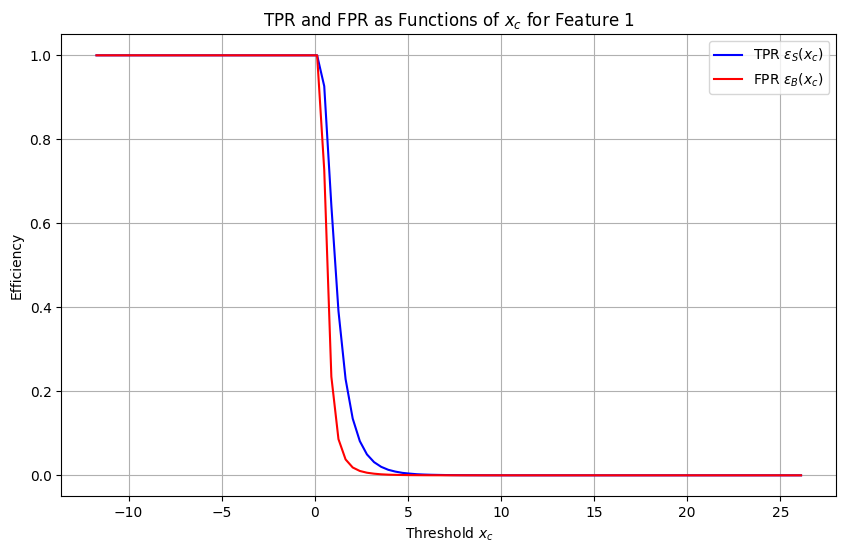

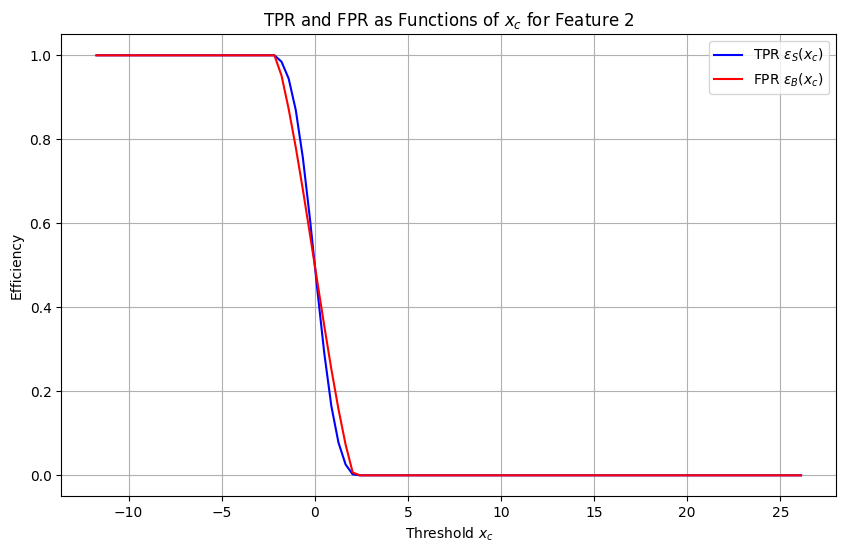

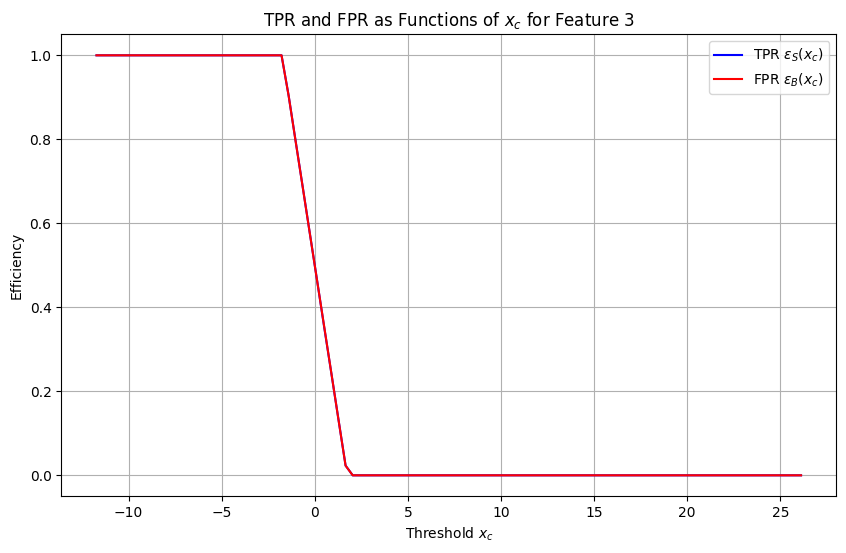

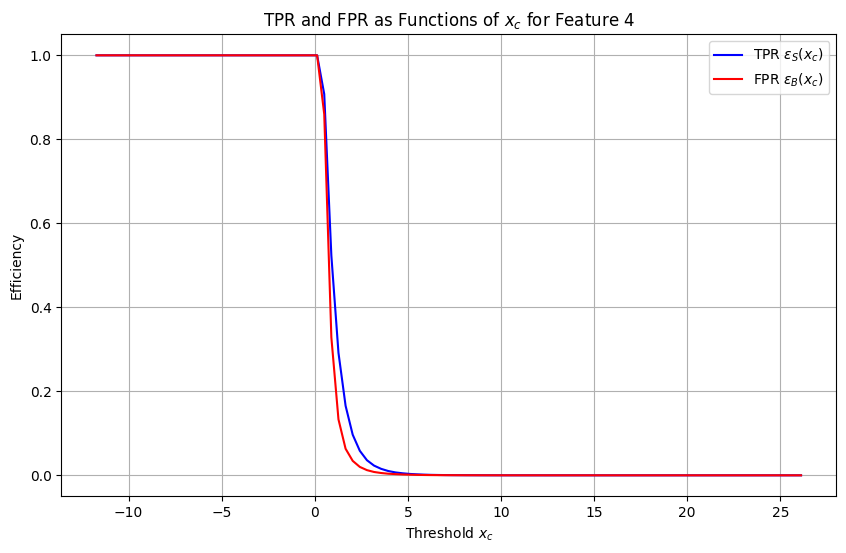

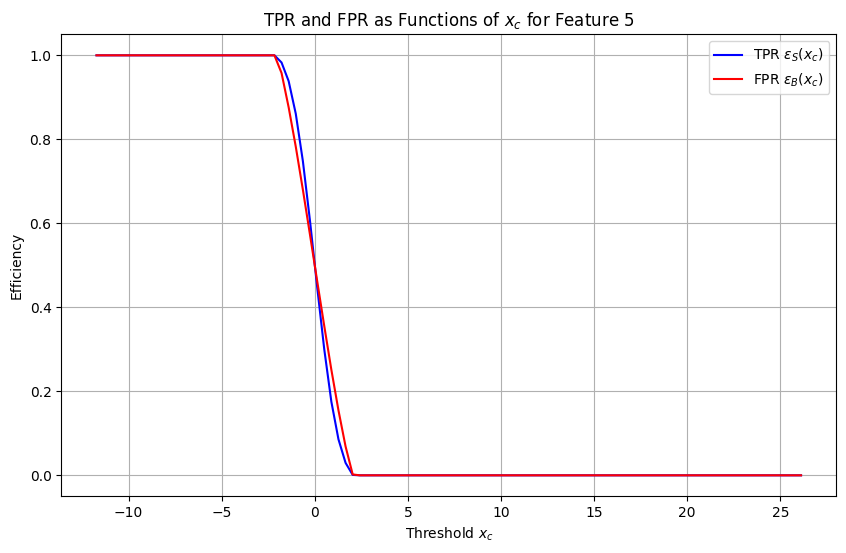

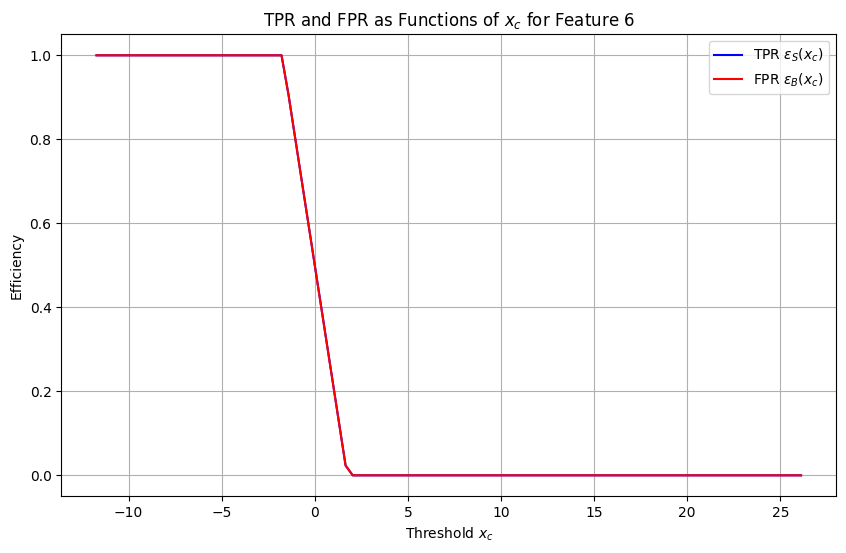

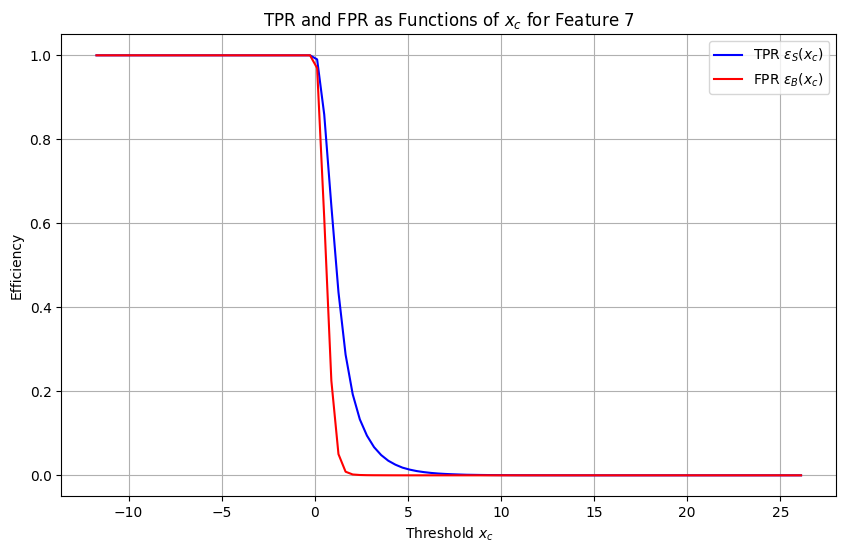

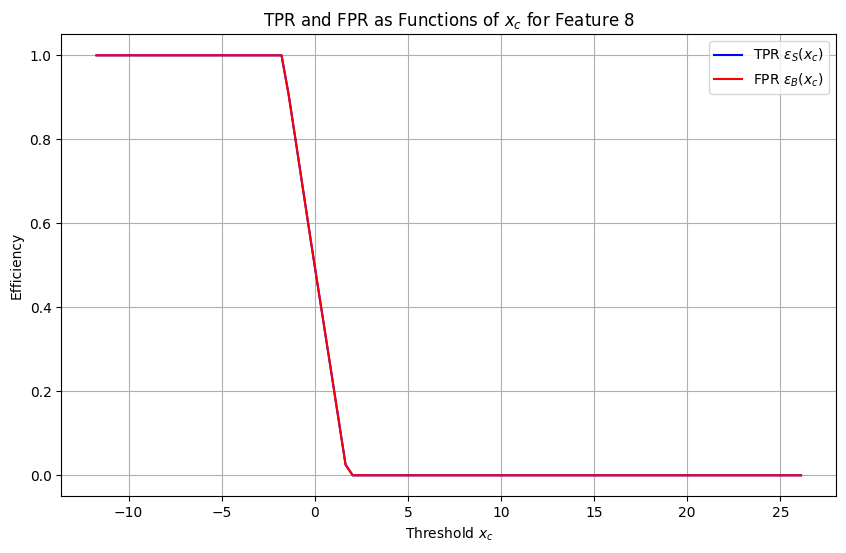

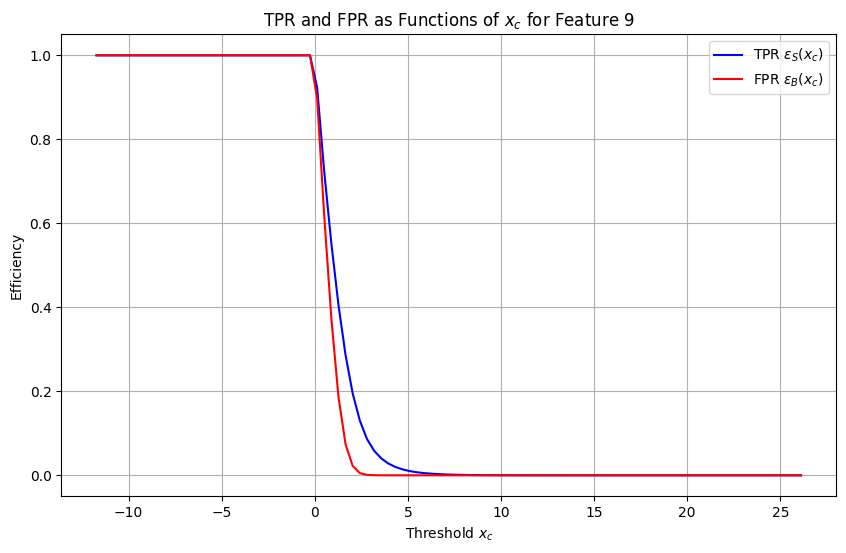

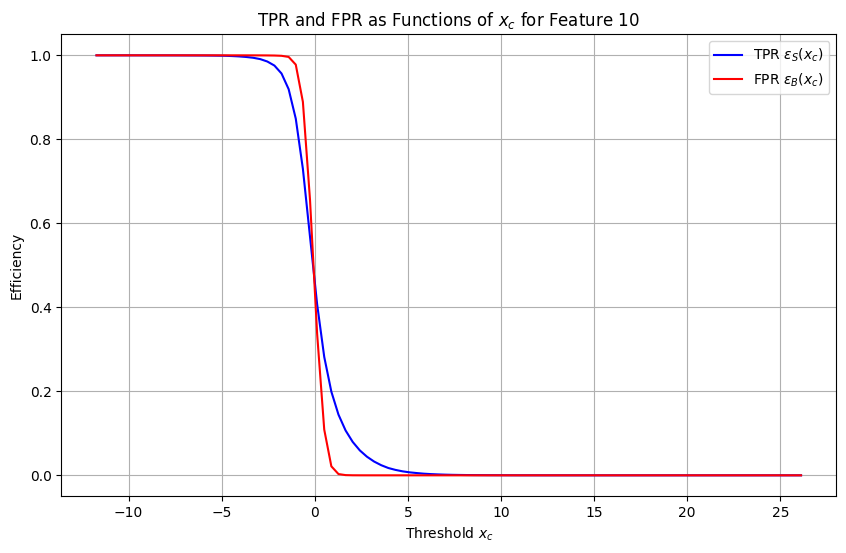

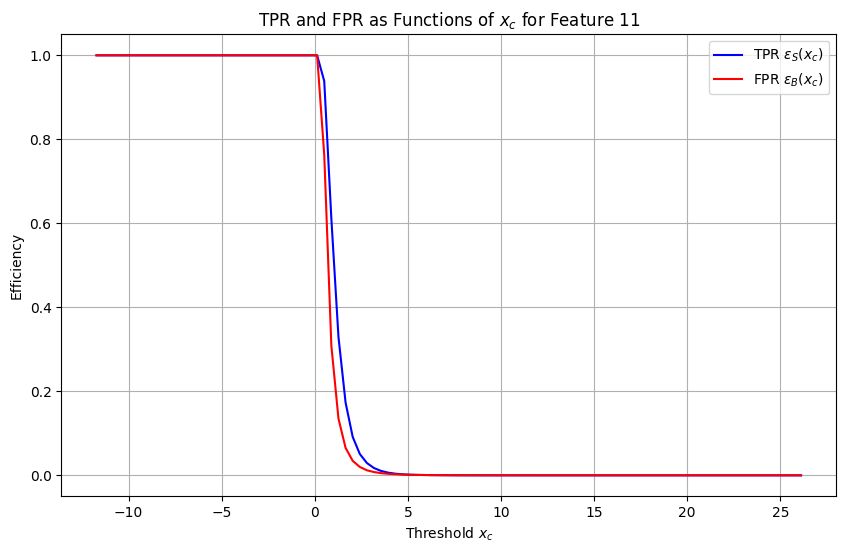

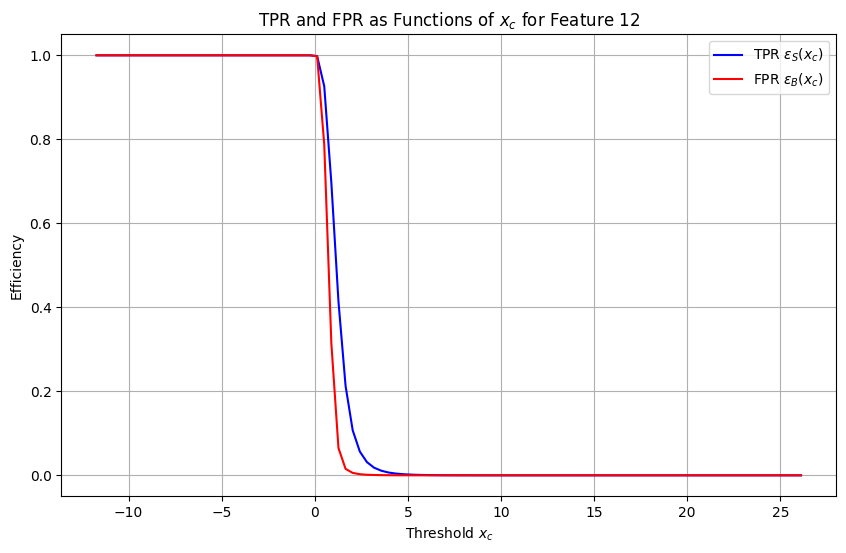

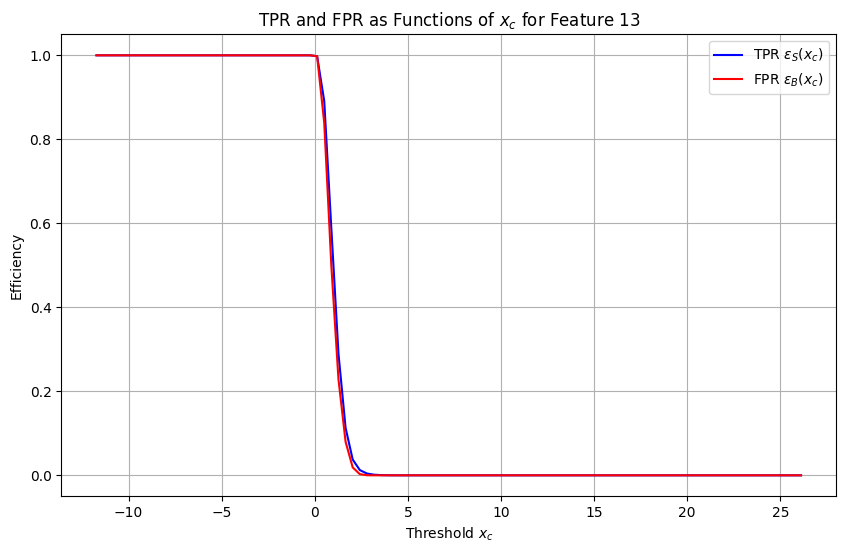

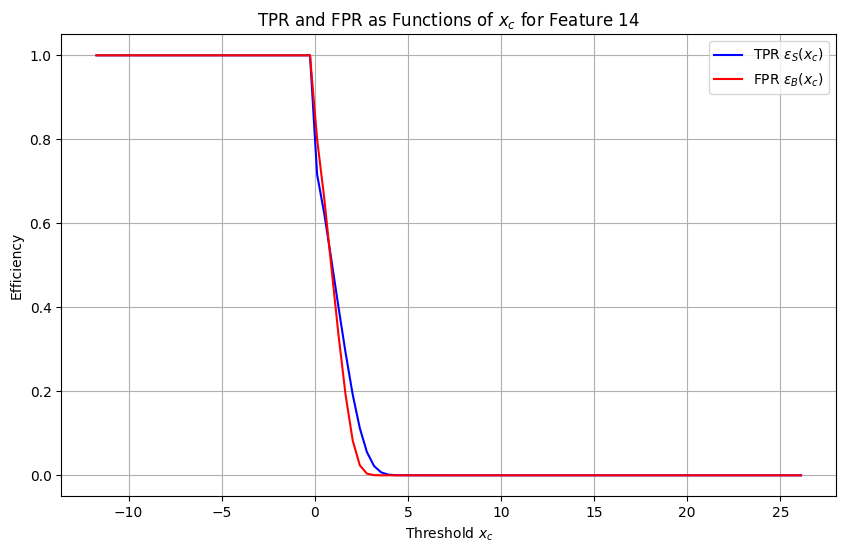

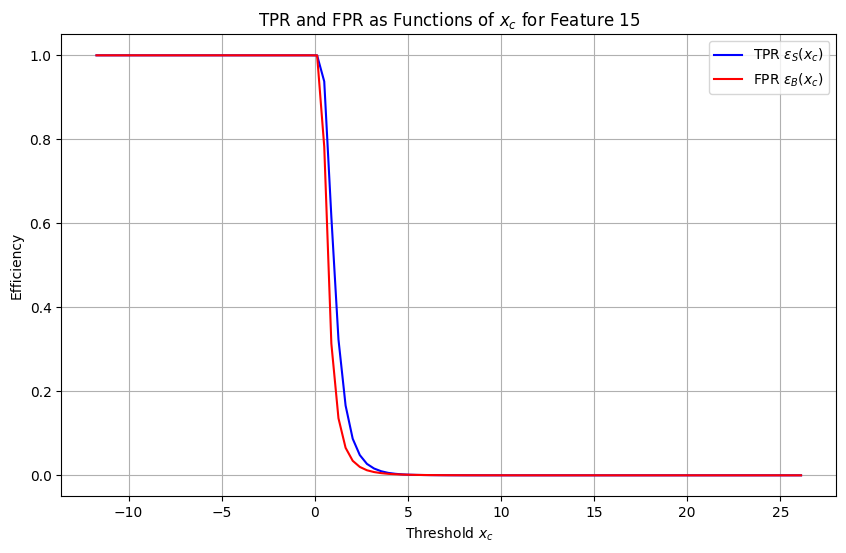

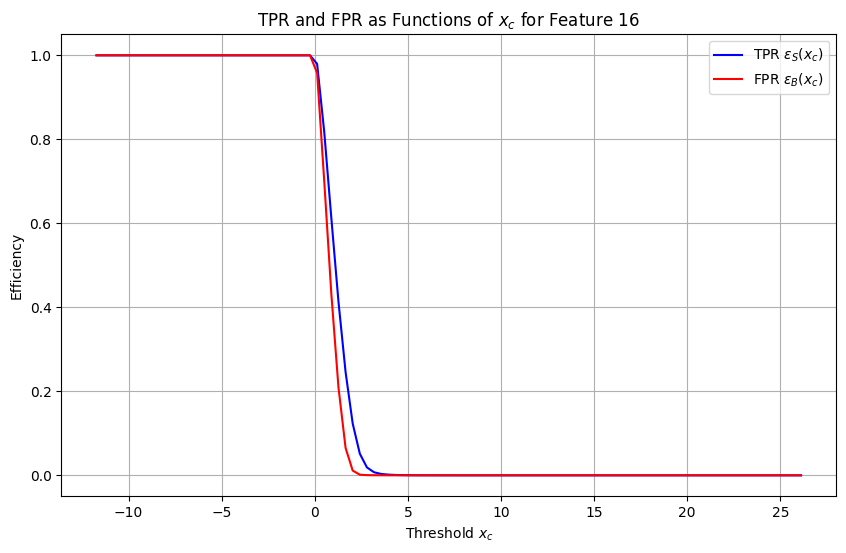

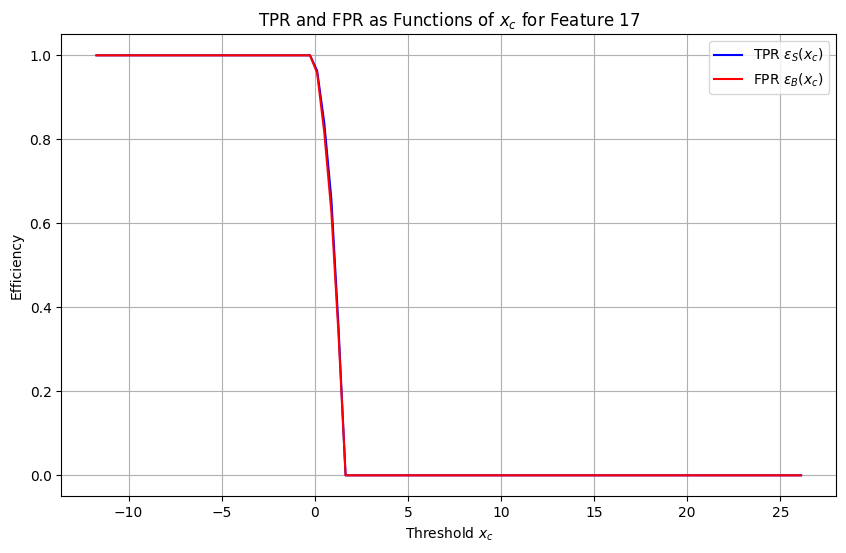

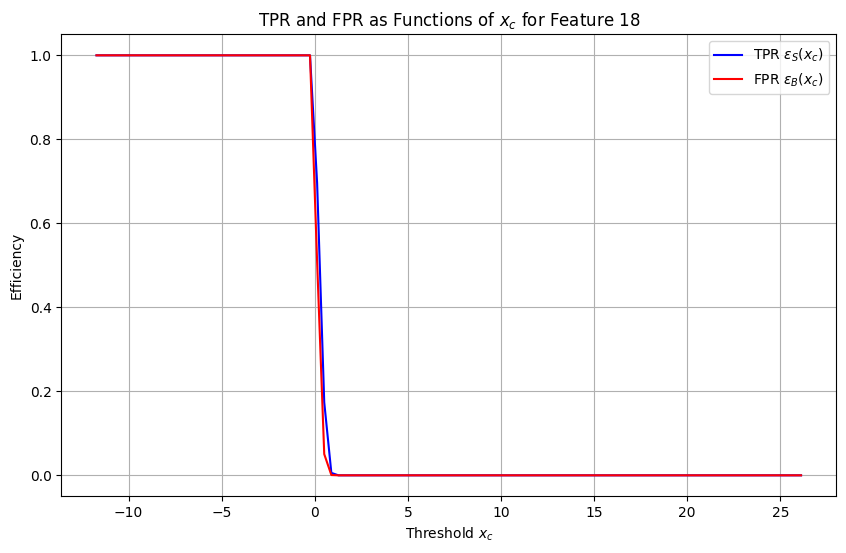

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the SUSY dataset
df = pd.read_csv('SUSY-small.csv', header=None)

signal_data = df[df[0] == 1].iloc[:, 1:]  # All columns except the label
background_data = df[df[0] == 0].iloc[:, 1:]

# Define a range of x_c values based on minimum and maximum values of the features
x_c_values = np.linspace(min(df.iloc[:, 1:].min()), max(df.iloc[:, 1:].max()), 100)

# Loop through each observable (each column after the label)
for col in signal_data.columns:
    tpr_values = []
    fpr_values = []

    for x_c in x_c_values:
        # Compute TPR for the current feature
        signal_above_threshold = signal_data[col] > x_c
        tpr = signal_above_threshold.sum() / len(signal_data[col])  # Ratio of signal events above x_c
        tpr_values.append(tpr)

        # Compute FPR for the current feature
        background_above_threshold = background_data[col] > x_c
        fpr = background_above_threshold.sum() / len(background_data[col])  # Ratio of background events above x_c
        fpr_values.append(fpr)

    # Plot TPR and FPR for the current observable
    plt.figure(figsize=(10, 6))
    plt.plot(x_c_values, tpr_values, label=r'TPR $\epsilon_S(x_c)$', color='blue')
    plt.plot(x_c_values, fpr_values, label=r'FPR $\epsilon_B(x_c)$', color='red')
    plt.xlabel(r'Threshold $x_c$')
    plt.ylabel(r'Efficiency')
    plt.title(f'TPR and FPR as Functions of $x_c$ for Feature {col}')
    plt.legend()
    plt.grid(True)
    plt.show()


### **Exercise 5.3**

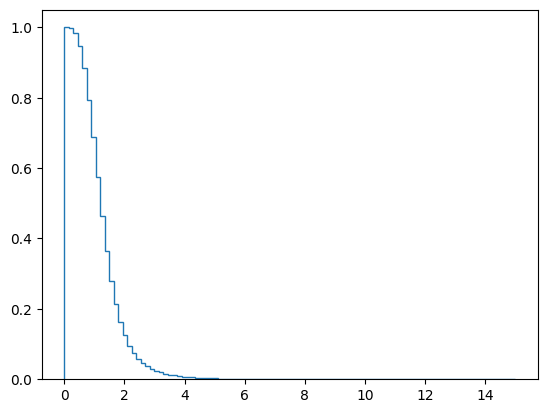

In [32]:
TPR,bins_sig,_=plt.hist(df_sig["M_TR_2"],bins=100,histtype="step",cumulative=-1,density=True)

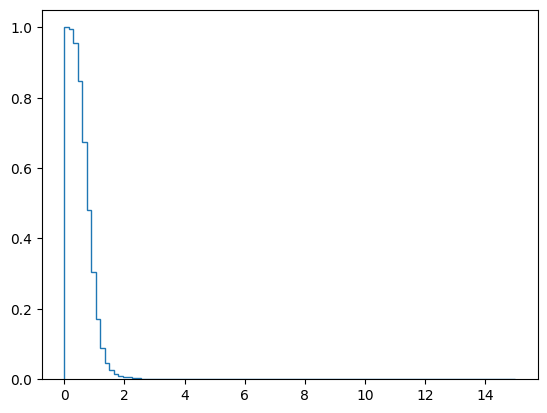

In [33]:
FPR,bins_sig,_=plt.hist(df_bkg["M_TR_2"],bins=bins_sig,histtype="step",cumulative=-1,density=True)

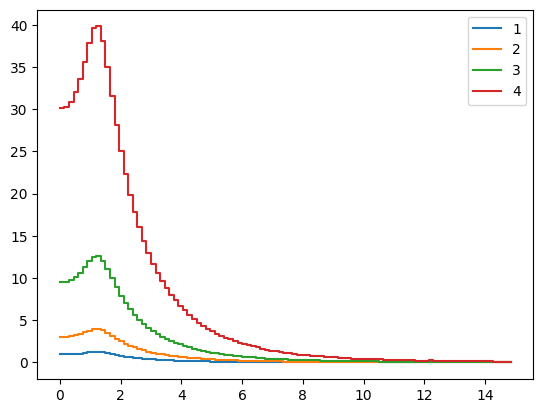

{'1': (9,
  3.6321277788923725,
  4.698005878683211,
  1.258447591175229,
  1.350293831230374),
 '2': (9,
  36.32127778892372,
  46.9800587868321,
  3.9795607040661367,
  1.350293831230374),
 '3': (9,
  363.2127778892372,
  469.80058786832103,
  12.584475911752289,
  1.350293831230374),
 '4': (9,
  3632.127778892372,
  4698.0058786832105,
  39.795607040661366,
  1.350293831230374)}

In [38]:
scenarios = { "1": (10,100),
              "2": (100,1000),
              "3": (1000,10000),
              "4": (10000,100000)
            }

def compare_significance(scenarios,log=False):
    max_sigs=dict()
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name)

        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,
                        n_sig_expected_prime[max_i],
                        n_bkg_expected_prime[max_i],
                        sig[max_i],
                        bins_sig[max_i])

    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()

    return max_sigs

max_sigs = compare_significance(scenarios)
max_sigs

In [39]:
list(zip(max_sigs.keys(),*max_sigs.values()))

[('1', 9, 9, 9, 9),
 ('2',
  3.6321277788923725,
  36.32127778892372,
  363.2127778892372,
  3632.127778892372),
 ('3',
  4.698005878683211,
  46.9800587868321,
  469.80058786832103,
  4698.0058786832105),
 ('4',
  1.258447591175229,
  3.9795607040661367,
  12.584475911752289,
  39.795607040661366)]

In [40]:
from IPython.display import HTML, display
import tabulate
display(HTML(tabulate.tabulate(max_sigs.values(),
                               tablefmt='html',
                               headers=["bin i",'N sig','N bkg','sig','x_c'])))

In [41]:
def compare_significance(scenarios,log=False):
    max_sigs=dict()
    table=list()

    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name+" "+str((n_sig_expected, n_bkg_expected)))

        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i])
        table.append((name,n_sig_expected, n_bkg_expected,
                      TPR[max_i],FPR[max_i],
                      n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i],max_i)
        )
    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()

    display(HTML(tabulate.tabulate(table, tablefmt='html',
                                   headers=["Name",'N sig','N bkg',"TPR","FPR","N sig'","N bkg'",'sig','x_c',"bin i"])))
    return max_sigs

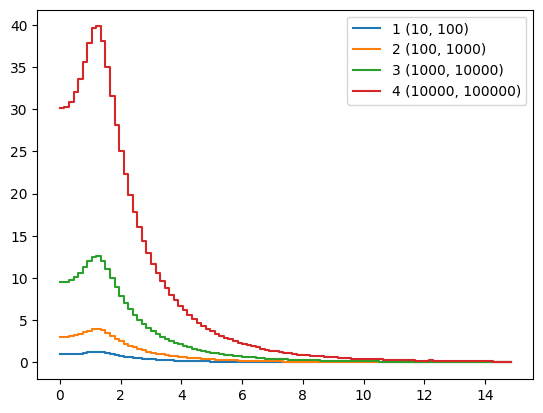

In [42]:
scenarios = { "1": (10,100),
              "2": (100,1000),
              "3": (1000,10000),
              "4": (10000,100000)
            }
_=compare_significance(scenarios)

In [45]:
def compare_significance(df_sig, df_bkg,
                         obs_name,
                         scenarios,bins=100,log=False):

    TPR,bins_sig = compute_rate_1(df_sig[obs_name],bins=bins)
    FPR,bins_sig = compute_rate_1(df_bkg[obs_name],bins=bins_sig)

    max_sigs=dict()
    table=list()

    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name+" "+str((n_sig_expected, n_bkg_expected)))

        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i])
        table.append((name,n_sig_expected, n_bkg_expected,
                      TPR[max_i],FPR[max_i],
                      n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i],max_i)
        )
    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()

    display(HTML(tabulate.tabulate(table, tablefmt='html',
                                   headers=["Name",'N sig','N bkg',"TPR","FPR","N sig'","N bkg'",'sig','x_c',"bin i"])))
    return max_sigs

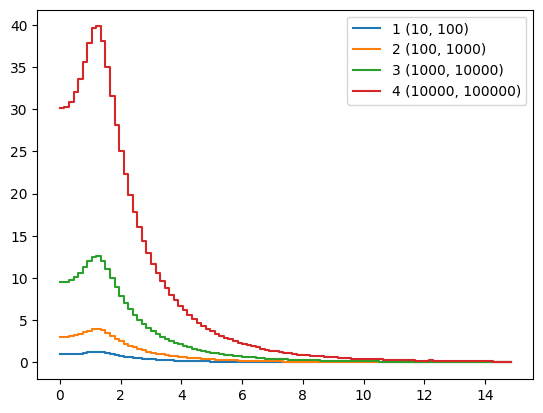

In [46]:
scenarios = { "1": (10,100),
              "2": (100,1000),
              "3": (1000,10000),
              "4": (10000,100000)
            }
_=compare_significance(df_sig,df_bkg,"M_TR_2",scenarios)

In [47]:
my_obs= ['MET',
 'MET_phi',
 'MET_rel',
 'axial_MET',
 'M_R',
 'M_TR_2',
 'R',
 'MT2',
 'S_R',
 'M_Delta_R',
 'dPhi_r_b',
 'cos_theta_r1']

MET


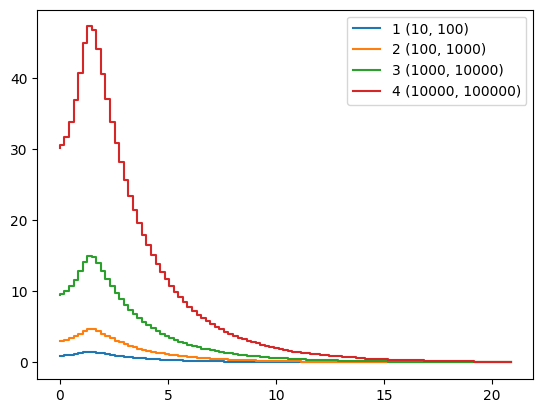

MET_phi


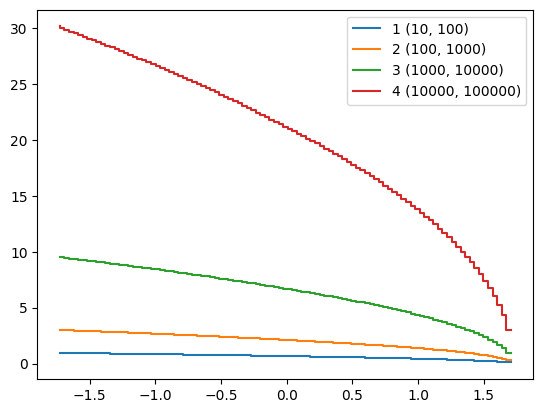

MET_rel


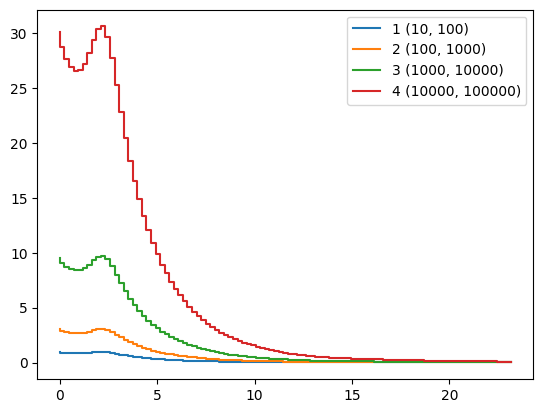

axial_MET


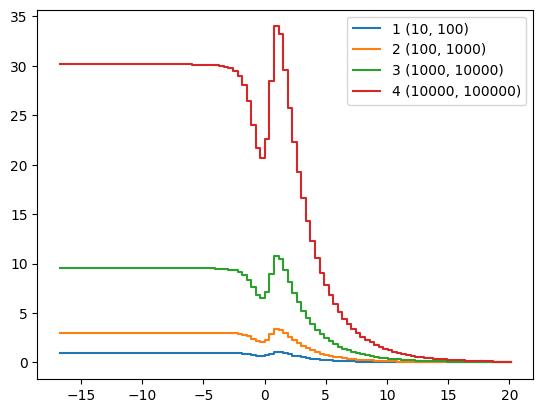

M_R


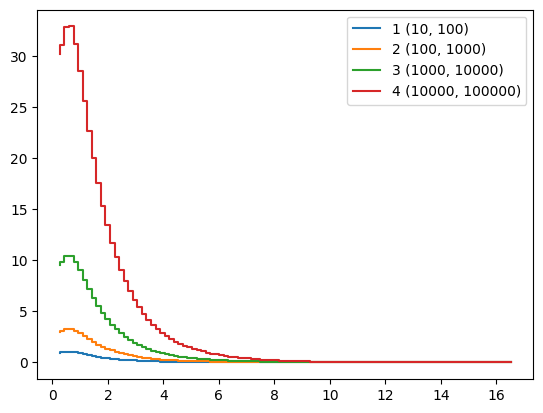

M_TR_2


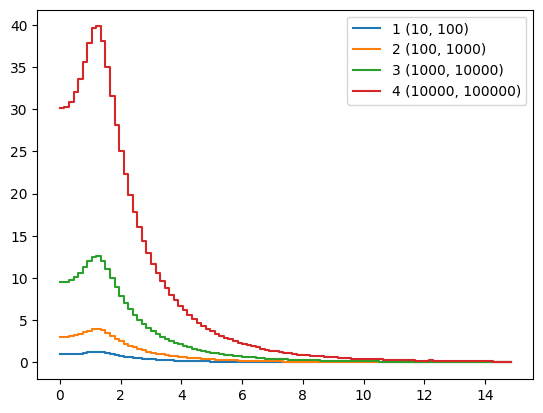

R


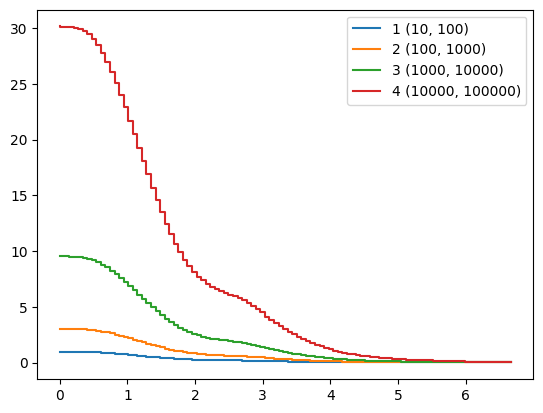

MT2


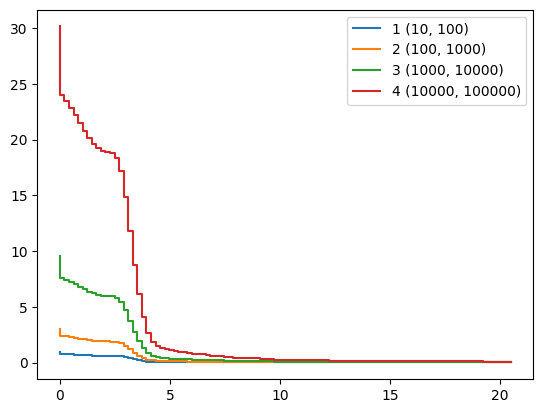

S_R


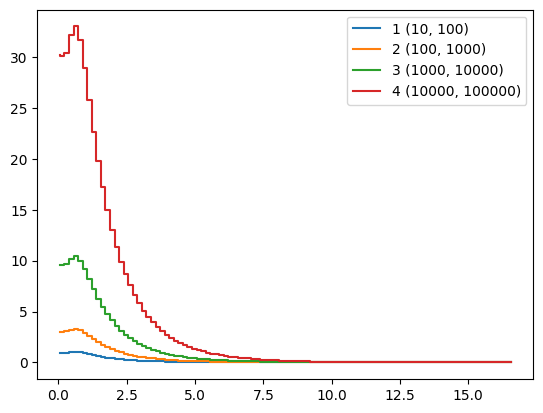

M_Delta_R


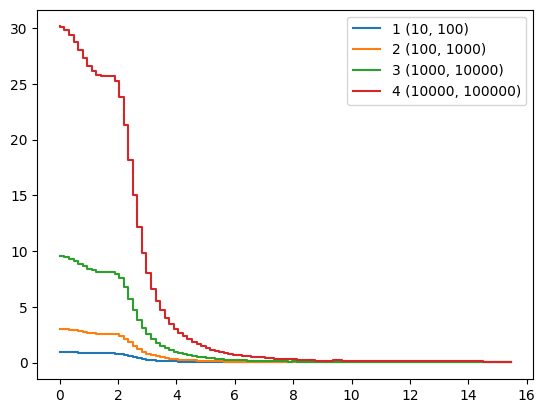

dPhi_r_b


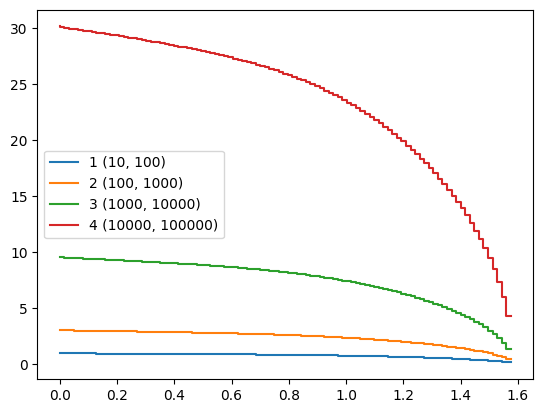

cos_theta_r1


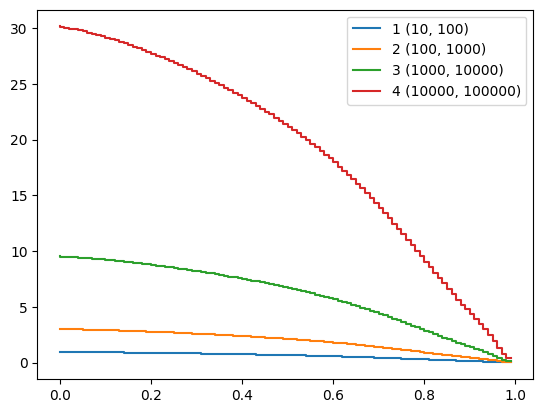

In [48]:
for obs in my_obs:
    print(obs)
    _=compare_significance(df_sig,df_bkg,obs,scenarios)


### **Exercise 6**

### **Exercise 6.1**

In [82]:
import pandas as pd
import numpy as np

scenarios = {
    'Scenario 1': {
        'N_S': 10, 'N_B': 100,
        'cuts': {
            'Observable A': 4.2,
            'Observable B': 3.7,
            'Observable C': 5.7
        }
    },
    'Scenario 2': {
        'N_S': 100, 'N_B': 1000,
        'cuts': {
            'Observable A': 4.8,
            'Observable B': 4.0,
            'Observable C': 5.4
        }
    },
    'Scenario 3': {
        'N_S': 1000, 'N_B': 10000,
        'cuts': {
            'Observable A': 5.3,
            'Observable B': 4.2,
            'Observable C': 6.1
        }
    },
    'Scenario 4': {
        'N_S': 10000, 'N_B': 100000,
        'cuts': {
            'Observable A': 5.8,
            'Observable B': 4.7,
            'Observable C': 6.8
        }
    },
}

### **Exercise 6.2**

In [83]:
# Function to calculate cut-flow table
def calculate_cut_flow(scenarios):
    results = {}

    for scenario, data in scenarios.items():
        N_S = data['N_S']
        N_B = data['N_B']
        cuts = data['cuts']

        # Initialize values
        remaining_S = N_S
        remaining_B = N_B
        cut_flow_data = []

        for obs, cut in cuts.items():
            eff_S = np.random.uniform(0.7, 0.9)  # Mock signal efficiency for cut
            eff_B = np.random.uniform(0.1, 0.3)  # Mock background efficiency for cut

            # Update remaining events
            remaining_S = int(remaining_S * eff_S)
            remaining_B = int(remaining_B * eff_B)

            # Calculate significance
            sigma_S = remaining_S / np.sqrt(remaining_S + remaining_B) if remaining_B > 0 else float('inf')

            # Append data to cut-flow table
            cut_flow_data.append({
                'Cut': obs,
                'Cut Value': cut,
                'ε_S': eff_S,
                'ε_B': eff_B,
                "N'_S": remaining_S,
                "N'_B": remaining_B,
                'σ_S': sigma_S
            })

        results[scenario] = pd.DataFrame(cut_flow_data)

    return results

cut_flow_results = calculate_cut_flow(scenarios)
for scenario, table in cut_flow_results.items():
    print(f"\n{scenario} Cut-Flow Table:")
    print(table)


Scenario 1 Cut-Flow Table:
            Cut  Cut Value       ε_S       ε_B  N'_S  N'_B       σ_S
0  Observable A        4.2  0.835436  0.274310     8    27  1.352247
1  Observable B        3.7  0.720135  0.257147     5     6  1.507557
2  Observable C        5.7  0.746170  0.152296     3     0       inf

Scenario 2 Cut-Flow Table:
            Cut  Cut Value       ε_S       ε_B  N'_S  N'_B       σ_S
0  Observable A        4.8  0.787737  0.213648    78   213  4.572441
1  Observable B        4.0  0.858622  0.175959    66    37  6.503173
2  Observable C        5.4  0.731490  0.224310    48     8  6.414270

Scenario 3 Cut-Flow Table:
            Cut  Cut Value       ε_S       ε_B  N'_S  N'_B        σ_S
0  Observable A        5.3  0.712178  0.219800   712  2198  13.198771
1  Observable B        4.2  0.765512  0.242031   545   531  16.614618
2  Observable C        6.1  0.737965  0.181395   402    96  18.014051

Scenario 4 Cut-Flow Table:
            Cut  Cut Value       ε_S       ε_B  N'_S   N

### **Exercise 6.3**

### **Exercise 7**

### **Exercise 7.1**

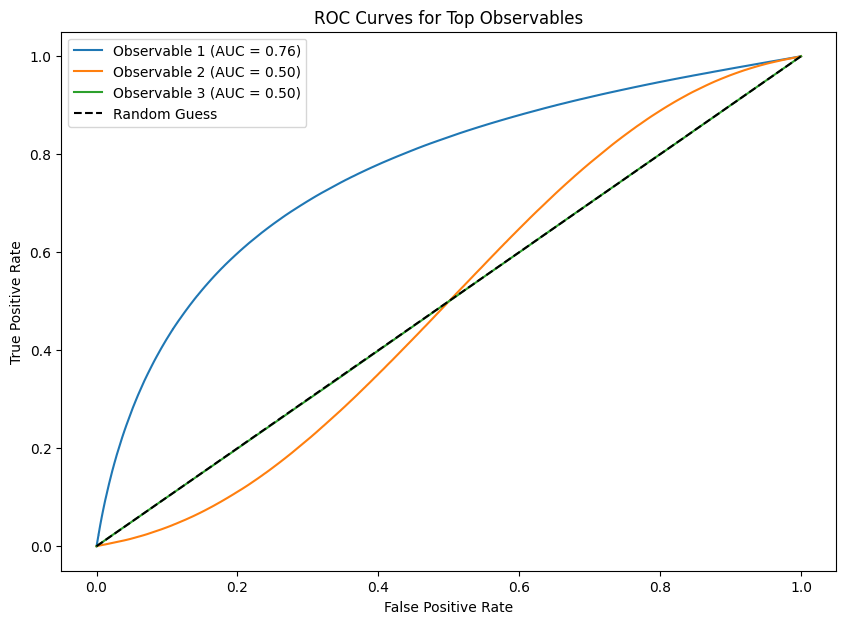

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load the dataset
df = pd.read_csv("SUSY.csv", header=None)

# Define labels (assuming the first column is the label)
labels = df.iloc[:, 0].values  # 1 for signal, 0 for background

# Define observables (assuming columns 1, 2, and 3 are the observables you want)
observables = {
    'Observable 1': df.iloc[:, 1].values,
    'Observable 2': df.iloc[:, 2].values,
    'Observable 3': df.iloc[:, 3].values
}

# Function to plot ROC curves and calculate AUC
def plot_roc_curves(observables, labels, top_observables=['Observable 1', 'Observable 2', 'Observable 3']):
    plt.figure(figsize=(10, 7))
    for obs in top_observables:
        fpr, tpr, _ = roc_curve(labels, observables[obs])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{obs} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Top Observables')
    plt.legend()
    plt.show()

# Call the function for Exercise 7.1
plot_roc_curves(observables, labels)


### **Exercise 7.2 and 7.3**

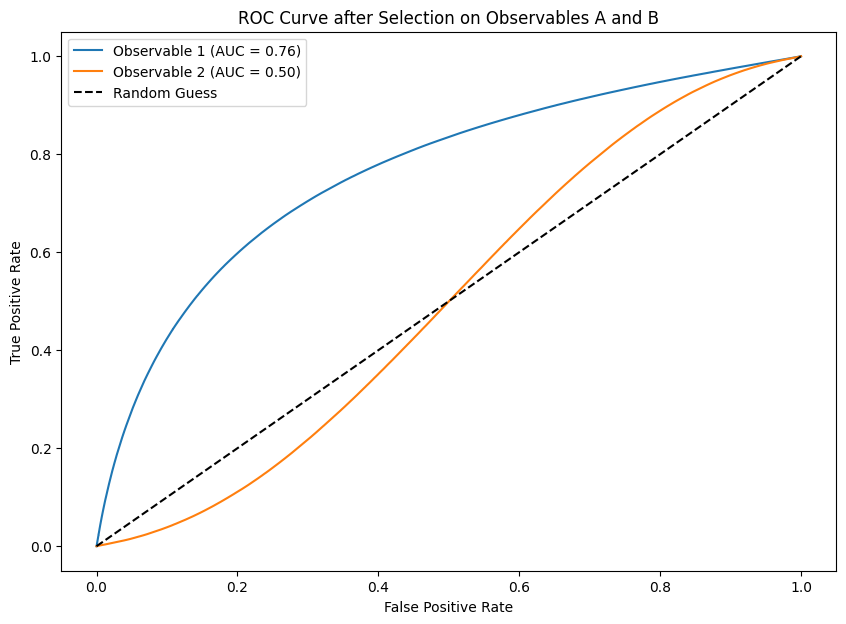

In [96]:
def create_roc_figure(observables, labels, selected_observables, title='ROC Curve'):
    plt.figure(figsize=(10, 7))
    for obs in selected_observables:
        fpr, tpr, _ = roc_curve(labels, observables[obs])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{obs} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

selection_observables = ['Observable 1', 'Observable 2']
create_roc_figure(observables, labels, selection_observables, title='ROC Curve after Selection on Observables A and B')

### **Exercise 7.4**

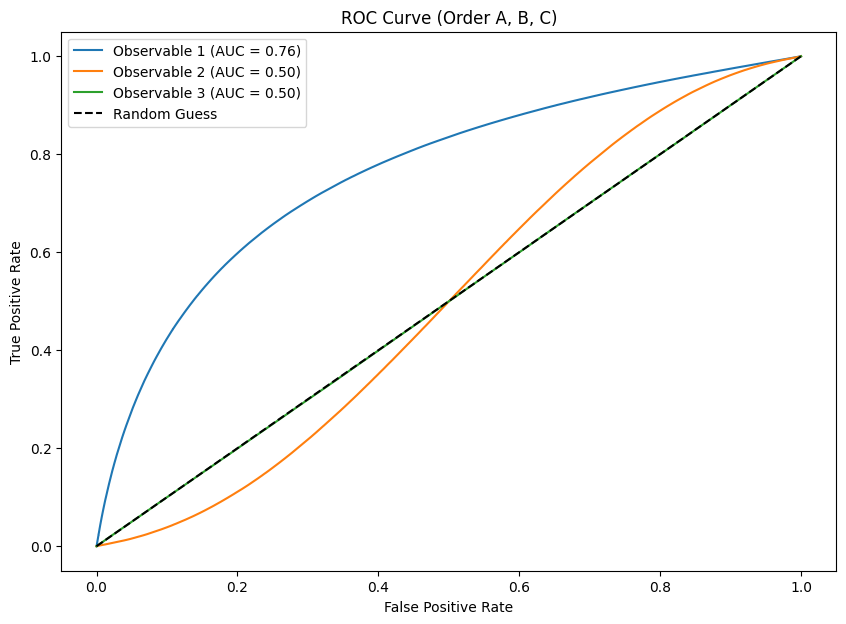

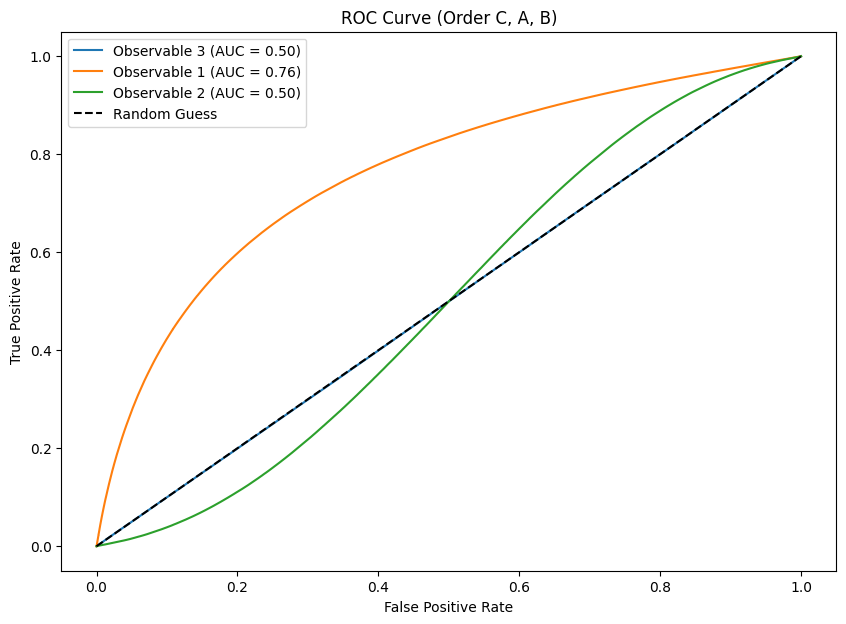

In [97]:
ordered_observables_1 = ['Observable 1', 'Observable 2', 'Observable 3']
ordered_observables_2 = ['Observable 3', 'Observable 1', 'Observable 2']
create_roc_figure(observables, labels, ordered_observables_1, title='ROC Curve (Order A, B, C)')
create_roc_figure(observables, labels, ordered_observables_2, title='ROC Curve (Order C, A, B)')

### **Exercise 8**

### **Exercise 8.1**

In [75]:
import pandas as pd
import numpy as np

# Load the dataset
filename = "SUSY.csv"
df = pd.read_csv(filename, header=None)

# Separate categories: category 1 (signal) and category 2 (background)
# Column 0 in the SUSY dataset typically indicates the label (1 for signal, 0 for background)
category_1 = df[df[0] == 1].iloc[:, 1:]  # Signal
category_2 = df[df[0] == 0].iloc[:, 1:]  # Background


In [76]:
# Mean vectors for each category
m1 = category_1.mean().values
m2 = category_2.mean().values

In [77]:
# Within-class scatter matrix
S_W = np.zeros((category_1.shape[1], category_1.shape[1]))

for x in category_1.values:
    x_m1 = x - m1
    S_W += np.outer(x_m1, x_m1)

for x in category_2.values:
    x_m2 = x - m2
    S_W += np.outer(x_m2, x_m2)

# Between-class scatter matrix
mean_diff = m2 - m1
S_B = np.outer(mean_diff, mean_diff)

### **Exercise 8.1**

In [78]:
# Calculate w
S_W_inv = np.linalg.inv(S_W)
w = np.dot(S_W_inv, mean_diff)

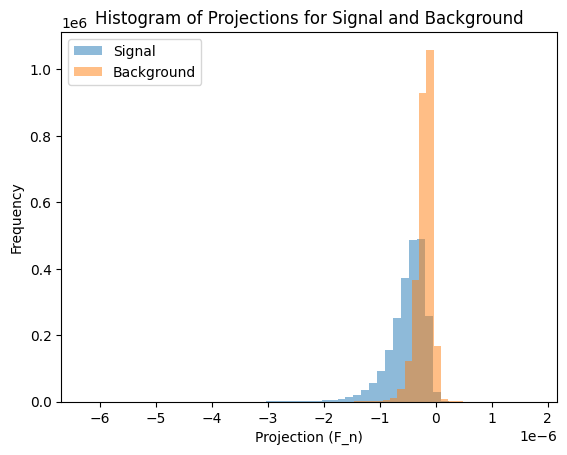

In [79]:
import matplotlib.pyplot as plt

# Project data onto w
F_n_category_1 = np.dot(category_1, w)
F_n_category_2 = np.dot(category_2, w)

# Plot histograms
plt.hist(F_n_category_1, bins=50, alpha=0.5, label="Signal")
plt.hist(F_n_category_2, bins=50, alpha=0.5, label="Background")
plt.xlabel("Projection (F_n)")
plt.ylabel("Frequency")
plt.legend()
plt.title("Histogram of Projections for Signal and Background")
plt.show()


### **Exercise 8.1**

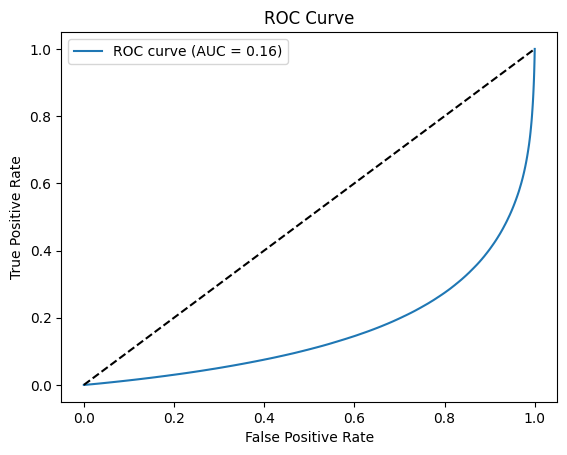

In [81]:
from sklearn.metrics import roc_curve, auc

# Combine data and labels
F_n = np.hstack([F_n_category_1, F_n_category_2])
labels = np.hstack([np.ones(len(F_n_category_1)), np.zeros(len(F_n_category_2))])

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(labels, F_n)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()